

```
# This is formatted as code
```

# [ World Happiness Report & Global Migration Patterns - Data for Good - Group ID: 15]

Group Members:

Cansu Akdeniz 26825

Egemen Çakır 27879

Eren Uluç 28475







## Introduction

Did you ever thought about what was the relationship between the happiness score of a country and the migration patterns of the world. In this project our goal is to analyze survey results from The World Happiness Report along with the global migration patterns to provide a better understanding of the migration trends taking place in the world. By using datas from World Happiness Report, United Nations International Migration and United Nations Intentional Homicides and Other Crimes we are going to visualize the migration ratio of countries from 2005 onward and compare the migration ratio with with the happiness scores of the countries alongside with the intentional homicide of said country. We are going to find the top three country people migrate to and migrate from in order to find a pattern.

### Utilized Datasets

Our first core dataset is from World Happiness Report. In this dataset, countries are given with certain scores in each category throughout certain years. The categories that are written are social support, healthy life expectancy at birth, freedom to make life choices, perceptions of corruption, positive affect, negative affect etc. The data of countries for each year is combined in order to have one data for each country by mean and the score of each category has been summed up in order to find a comparable score.
(https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForTable2.1.xls)

Our second core dataset is from United Nations International Migration. In this dataset, we are looking at the countries migration ratio between the years 2005 and 2017. The average of ratios for each country has been calculated. Negative average allows us to understand that people migrated from that country and positive average allows us to understand that people migrated to that country. 
(https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates17.asp)

Our first additional dataset is from United Nations Intentional Homicides and Other Crimes dataset. In this dataset, various crime rates per 100,000 people for every country has been given. Only the intentional homicides between the years 2005-2017 have been usen and the data of countries for each year is combined in order to have one data for each country by mean. 
(http://data.un.org/)

Our second additional dataset is again from United Nations International Migration. In this dataset, the amount of people who entered each country is given to us. This allowed us to compare the amount of people who migrate to a country with its migration ratio. 
(https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates17.asp)

## Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5OW5nDgtY1uzOr89sJBbIz1IDQuJZFIYkum2Id84eJoVSpb8bV5Tw
Mounted at /content/drive


### Visualizations Descriptive Statistics of Core Dataset 1

In the code piece below, we read our first core dataset (from World Happiness Report).

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from scipy.stats import ttest_1samp

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
df = pd.read_excel("/content/WHR20_DataForTable2.1.xls")
gdf = df

print(df)

     Country name  ...  Most people can be trusted, WVS round 2010-2014
0     Afghanistan  ...                                              NaN
1     Afghanistan  ...                                              NaN
2     Afghanistan  ...                                              NaN
3     Afghanistan  ...                                              NaN
4     Afghanistan  ...                                              NaN
...           ...  ...                                              ...
1843     Zimbabwe  ...                                         0.082942
1844     Zimbabwe  ...                                         0.082942
1845     Zimbabwe  ...                                         0.082942
1846     Zimbabwe  ...                                         0.082942
1847     Zimbabwe  ...                                         0.082942

[1848 rows x 26 columns]


We collect every country name in the dataset and put it into country_name.

In [ ]:
country_name = df["Country name"]

print(country_name)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1843       Zimbabwe
1844       Zimbabwe
1845       Zimbabwe
1846       Zimbabwe
1847       Zimbabwe
Name: Country name, Length: 1848, dtype: object


Since the name of a country can be written many times in the data, we write the code peace below to take the names of the countries without repetition and put them in a list called Country_Name.

In [ ]:
Country_Name = []
for i in range(1848):
  if df["Country name"][i] not in Country_Name:
    Country_Name.append(df["Country name"][i])

print(Country_Name)


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'L

We take the mean of values at each category of the same country in order to merge them.

In [ ]:
df = df.groupby("Country name").mean()

print(df)


                     year  ...  Most people can be trusted, WVS round 2010-2014
Country name               ...                                                 
Afghanistan   2013.500000  ...                                              NaN
Albania       2013.416667  ...                                              NaN
Algeria       2014.625000  ...                                         0.179286
Angola        2012.500000  ...                                              NaN
Argentina     2012.500000  ...                                         0.193531
...                   ...  ...                                              ...
Venezuela     2012.357143  ...                                              NaN
Vietnam       2012.500000  ...                                              NaN
Yemen         2013.416667  ...                                         0.385000
Zambia        2012.692308  ...                                              NaN
Zimbabwe      2012.500000  ...          

Since parts of the data is not important for us, we removed them.

In [ ]:
df = df.drop("year", axis = 1)
df = df.drop("Most people can be trusted, WVS round 1981-1984", axis = 1)
df = df.drop("Most people can be trusted, WVS round 1989-1993", axis = 1)
df = df.drop("Most people can be trusted, WVS round 1994-1998", axis = 1)
df = df.drop("Most people can be trusted, WVS round 1999-2004", axis = 1)
df = df.drop("Standard deviation/Mean of ladder by country-year", axis = 1)
df = df.drop("GINI index (World Bank estimate)", axis = 1)
df = df.drop("Standard deviation of ladder by country-year", axis = 1)

print(df)

              Life Ladder  ...  Most people can be trusted, WVS round 2010-2014
Country name               ...                                                 
Afghanistan      3.594628  ...                                              NaN
Albania          4.990636  ...                                              NaN
Algeria          5.389717  ...                                         0.179286
Angola           4.420299  ...                                              NaN
Argentina        6.339423  ...                                         0.193531
...                   ...  ...                                              ...
Venezuela        6.123013  ...                                              NaN
Vietnam          5.305872  ...                                              NaN
Yemen            3.912124  ...                                         0.385000
Zambia           4.529805  ...                                              NaN
Zimbabwe         3.934324  ...          

Some of the values of the categories are negative and some of them are positive variable and since some values of negative variables are written in positive numbers we divide them into -1. For example, negative affects are written as positive values even though they are bad for happiness. This allowed us to sum the values at each category per country as positive one being positive and negative ones being negative. 

In [ ]:
df.div([1,1,1,1,1,1,-1,1,-1,1,1,1,-1,-1,1,1,1])
df["sum"] = df.sum(axis=1)

print(df)

              Life Ladder  ...        sum
Country name               ...           
Afghanistan      3.594628  ...  63.792171
Albania          4.990636  ...  85.964210
Algeria          5.389717  ...  82.043250
Angola           4.420299  ...  69.175770
Argentina        6.339423  ...  88.990971
...                   ...  ...        ...
Venezuela        6.123013  ...  83.690817
Vietnam          5.305872  ...  85.531106
Yemen            3.912124  ...  68.393174
Zambia           4.529805  ...  69.052716
Zimbabwe         3.934324  ...  63.530274

[166 rows x 18 columns]


We created lists for happiness sum and life ladder and store the values in their respected lists in order to use them in latter stages.

In [ ]:
Happiness_Sum = []
for i in range(166):
  Happiness_Sum.append(df["sum"][i])

Life_Ladder = []
for i in range(166):
  Life_Ladder.append(df["Life Ladder"][i])

### Spatial and Temporal Analysis of Core Dataset 1

Below is all the numeric data we collected for each category to have a general perspective of the world.

In [ ]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",sum
count,166.000000,163.000000,165.000000,162.000000,166.000000,162.000000,161.000000,164.000000,165.000000,155.000000,164.000000,164.000000,143.000000,163.000000,129.000000,53.000000,57.000000,166.000000
mean,5.392184,9.198929,0.804316,62.490228,0.736446,0.005210,0.736809,0.708265,0.269982,0.504878,-0.177059,-0.069282,0.388278,0.459586,0.237770,0.264348,0.233136,79.996046
std,1.058779,1.194986,0.116413,7.612706,0.130479,0.149253,0.181132,0.097925,0.071737,0.180985,0.880869,0.977077,0.080886,0.100657,0.117637,0.167001,0.156825,15.036625
min,3.401875,6.579909,0.402559,43.356001,0.281458,-0.281210,0.097752,0.508669,0.117528,0.173071,-2.213782,-2.112402,0.249500,0.267800,0.067373,0.038242,0.031518,9.387554
25%,4.499712,8.263662,0.750635,56.543461,0.651742,-0.107667,0.692225,0.624177,0.218784,0.369644,-0.772194,-0.751340,0.326160,0.382014,0.142481,0.143534,0.118725,72.322081
50%,5.299970,9.314939,0.824556,64.789836,0.744360,-0.008718,0.794055,0.710575,0.261790,0.483620,-0.285008,-0.277226,0.372667,0.442097,0.213497,0.198380,0.193531,82.614205
75%,6.183112,10.151770,0.898972,67.796266,0.833296,0.084864,0.850494,0.795707,0.315151,0.614277,0.552321,0.615548,0.435083,0.519831,0.306121,0.391370,0.329065,88.810421
max,7.692139,11.682664,0.976763,75.358461,0.953241,0.618981,0.953186,0.875515,0.510459,0.969535,1.476863,2.023685,0.624000,0.788792,0.630413,0.737305,0.661757,100.783091


We created a box plot for the sum that we find.

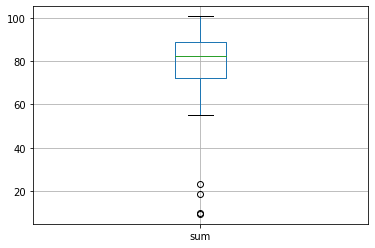

In [ ]:
df.boxplot(column=["sum"])

Created a graph in order to compare the sum values of each country in South America.


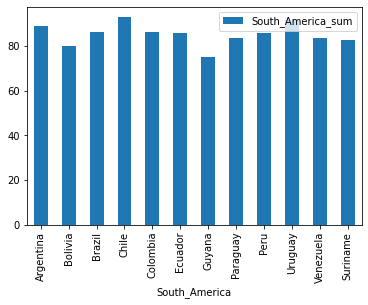

In [ ]:
South_America = []

South_America.append(Country_Name[4])
South_America.append(Country_Name[16])
South_America.append(Country_Name[19])
South_America.append(Country_Name[28])
South_America.append(Country_Name[30])
South_America.append(Country_Name[42])
South_America.append(Country_Name[57])
South_America.append(Country_Name[116])
South_America.append(Country_Name[117])
South_America.append(Country_Name[159])
South_America.append(Country_Name[161])
South_America.append(Country_Name[140])

South_America_sum =[]
South_America_sum.append(df["sum"][4])
South_America_sum.append(df["sum"][16])
South_America_sum.append(df["sum"][19])
South_America_sum.append(df["sum"][28])
South_America_sum.append(df["sum"][30])
South_America_sum.append(df["sum"][42])
South_America_sum.append(df["sum"][57])
South_America_sum.append(df["sum"][116])
South_America_sum.append(df["sum"][117])
South_America_sum.append(df["sum"][159])
South_America_sum.append(df["sum"][161])
South_America_sum.append(df["sum"][140])

df555 = pd.DataFrame({'South_America':South_America,'South_America_sum':South_America_sum})

ax555 = df555.plot.bar(x='South_America', y='South_America_sum', rot=90)

Created a graph in order to compare the sum values of each country in Western Europe.

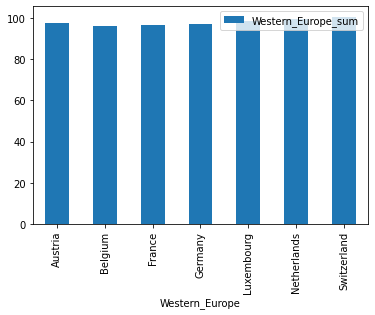

In [ ]:
Western_Europe = []

Western_Europe.append(Country_Name[7])
Western_Europe.append(Country_Name[12])
Western_Europe.append(Country_Name[48])
Western_Europe.append(Country_Name[52])
Western_Europe.append(Country_Name[86])
Western_Europe.append(Country_Name[105])
Western_Europe.append(Country_Name[143])

Western_Europe_sum =[]
Western_Europe_sum.append(df["sum"][7])
Western_Europe_sum.append(df["sum"][12])
Western_Europe_sum.append(df["sum"][48])
Western_Europe_sum.append(df["sum"][52])
Western_Europe_sum.append(df["sum"][86])
Western_Europe_sum.append(df["sum"][105])
Western_Europe_sum.append(df["sum"][143])

df444 = pd.DataFrame({'Western_Europe':Western_Europe,'Western_Europe_sum':Western_Europe_sum})

ax444 = df444.plot.bar(x='Western_Europe', y='Western_Europe_sum', rot=90)

Created a graph in order to compare the sum values of each country in Southern Europe.

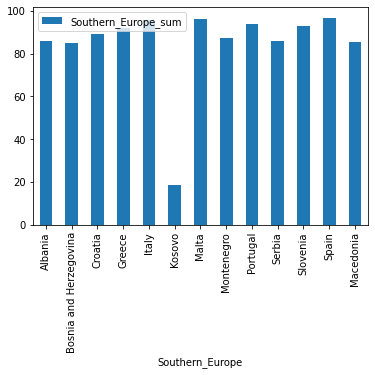

In [ ]:
Southern_Europe = []

Southern_Europe.append(Country_Name[1])
Southern_Europe.append(Country_Name[17])
Southern_Europe.append(Country_Name[35])
Southern_Europe.append(Country_Name[54])
Southern_Europe.append(Country_Name[69])
Southern_Europe.append(Country_Name[76])
Southern_Europe.append(Country_Name[93])
Southern_Europe.append(Country_Name[99])
Southern_Europe.append(Country_Name[120])
Southern_Europe.append(Country_Name[127])
Southern_Europe.append(Country_Name[131])
Southern_Europe.append(Country_Name[137])
Southern_Europe.append(Country_Name[87])

Southern_Europe_sum =[]
Southern_Europe_sum.append(df["sum"][1])
Southern_Europe_sum.append(df["sum"][17])
Southern_Europe_sum.append(df["sum"][35])
Southern_Europe_sum.append(df["sum"][54])
Southern_Europe_sum.append(df["sum"][69])
Southern_Europe_sum.append(df["sum"][76])
Southern_Europe_sum.append(df["sum"][93])
Southern_Europe_sum.append(df["sum"][99])
Southern_Europe_sum.append(df["sum"][120])
Southern_Europe_sum.append(df["sum"][127])
Southern_Europe_sum.append(df["sum"][131])
Southern_Europe_sum.append(df["sum"][137])
Southern_Europe_sum.append(df["sum"][87])

df333 = pd.DataFrame({'Southern_Europe':Southern_Europe,'Southern_Europe_sum':Southern_Europe_sum})

ax333 = df333.plot.bar(x='Southern_Europe', y='Southern_Europe_sum', rot=90)

Created a graph in order to compare the sum values of each country in Northern Europe.

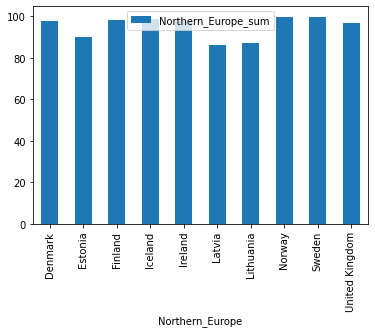

In [ ]:
Northern_Europe = []

Northern_Europe.append(Country_Name[39])
Northern_Europe.append(Country_Name[45])
Northern_Europe.append(Country_Name[47])
Northern_Europe.append(Country_Name[62])
Northern_Europe.append(Country_Name[67])
Northern_Europe.append(Country_Name[80])
Northern_Europe.append(Country_Name[85])
Northern_Europe.append(Country_Name[111])
Northern_Europe.append(Country_Name[142])
Northern_Europe.append(Country_Name[157])

Northern_Europe_sum =[]
Northern_Europe_sum.append(df["sum"][39])
Northern_Europe_sum.append(df["sum"][45])
Northern_Europe_sum.append(df["sum"][47])
Northern_Europe_sum.append(df["sum"][62])
Northern_Europe_sum.append(df["sum"][67])
Northern_Europe_sum.append(df["sum"][80])
Northern_Europe_sum.append(df["sum"][85])
Northern_Europe_sum.append(df["sum"][111])
Northern_Europe_sum.append(df["sum"][142])
Northern_Europe_sum.append(df["sum"][157])

df222 = pd.DataFrame({'Northern_Europe':Northern_Europe,'Northern_Europe_sum':Northern_Europe_sum})

ax222 = df222.plot.bar(x='Northern_Europe', y='Northern_Europe_sum', rot=90)

Created a graph in order to compare the sum values of each country in Eastern Europe.

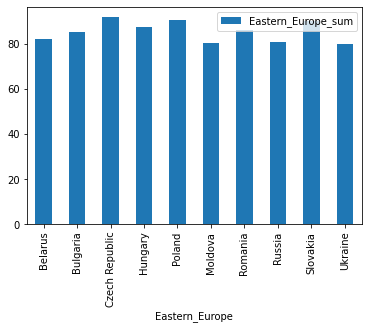

In [ ]:
Eastern_Europe = []

Eastern_Europe.append(Country_Name[11])
Eastern_Europe.append(Country_Name[20])
Eastern_Europe.append(Country_Name[38])
Eastern_Europe.append(Country_Name[61])
Eastern_Europe.append(Country_Name[119])
Eastern_Europe.append(Country_Name[97])
Eastern_Europe.append(Country_Name[122])
Eastern_Europe.append(Country_Name[123])
Eastern_Europe.append(Country_Name[130])
Eastern_Europe.append(Country_Name[155])

Eastern_Europe_sum =[]
Eastern_Europe_sum.append(df["sum"][11])
Eastern_Europe_sum.append(df["sum"][20])
Eastern_Europe_sum.append(df["sum"][38])
Eastern_Europe_sum.append(df["sum"][61])
Eastern_Europe_sum.append(df["sum"][119])
Eastern_Europe_sum.append(df["sum"][97])
Eastern_Europe_sum.append(df["sum"][122])
Eastern_Europe_sum.append(df["sum"][123])
Eastern_Europe_sum.append(df["sum"][130])
Eastern_Europe_sum.append(df["sum"][155])

df111 = pd.DataFrame({'Eastern_Europe':Eastern_Europe,'Eastern_Europe_sum':Eastern_Europe_sum})

ax111 = df111.plot.bar(x='Eastern_Europe', y='Eastern_Europe_sum', rot=90)

Created a graph in order to compare the sum values of each country in Central Asia.

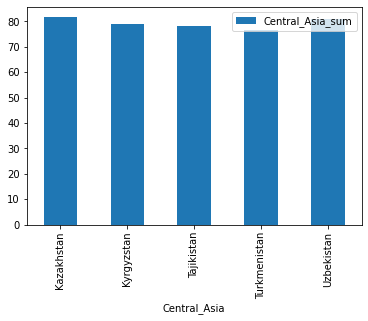

In [ ]:
Central_Asia = []

Central_Asia.append(Country_Name[74])
Central_Asia.append(Country_Name[78])
Central_Asia.append(Country_Name[146])
Central_Asia.append(Country_Name[153])
Central_Asia.append(Country_Name[160])

Central_Asia_sum =[]

Central_Asia_sum.append(df["sum"][74])
Central_Asia_sum.append(df["sum"][78])
Central_Asia_sum.append(df["sum"][146])
Central_Asia_sum.append(df["sum"][153])
Central_Asia_sum.append(df["sum"][160])

df101 = pd.DataFrame({'Central_Asia':Central_Asia,'Central_Asia_sum':Central_Asia_sum})

ax101 = df101.plot.bar(x='Central_Asia', y='Central_Asia_sum', rot=90)

Created a graph in order to compare the sum values of each country in Eastern Asia.

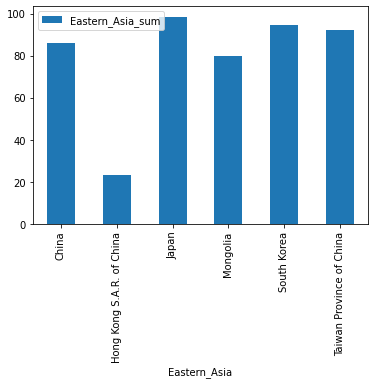

In [ ]:
Eastern_Asia = []

Eastern_Asia.append(Country_Name[29])
Eastern_Asia.append(Country_Name[60])
Eastern_Asia.append(Country_Name[72])
Eastern_Asia.append(Country_Name[98])
Eastern_Asia.append(Country_Name[135])
Eastern_Asia.append(Country_Name[145])

Eastern_Asia_sum =[]

Eastern_Asia_sum.append(df["sum"][29])
Eastern_Asia_sum.append(df["sum"][60])
Eastern_Asia_sum.append(df["sum"][72])
Eastern_Asia_sum.append(df["sum"][98])
Eastern_Asia_sum.append(df["sum"][135])
Eastern_Asia_sum.append(df["sum"][145])

df102 = pd.DataFrame({'Eastern_Asia':Eastern_Asia,'Eastern_Asia_sum':Eastern_Asia_sum})

ax102 = df102.plot.bar(x='Eastern_Asia', y='Eastern_Asia_sum', rot=90)

Created a graph in order to compare the sum values of each country in Southern Asia.

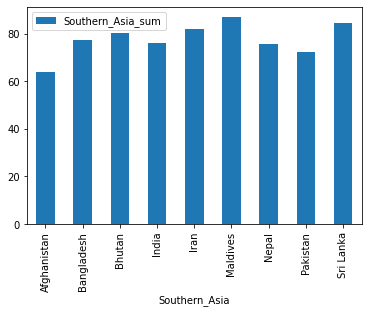

In [ ]:
Southern_Asia = []

Southern_Asia.append(Country_Name[0])
Southern_Asia.append(Country_Name[10])
Southern_Asia.append(Country_Name[15])
Southern_Asia.append(Country_Name[63])
Southern_Asia.append(Country_Name[65])
Southern_Asia.append(Country_Name[91])
Southern_Asia.append(Country_Name[104])
Southern_Asia.append(Country_Name[113])
Southern_Asia.append(Country_Name[138])

Southern_Asia_sum =[]

Southern_Asia_sum.append(df["sum"][0])
Southern_Asia_sum.append(df["sum"][10])
Southern_Asia_sum.append(df["sum"][15])
Southern_Asia_sum.append(df["sum"][63])
Southern_Asia_sum.append(df["sum"][65])
Southern_Asia_sum.append(df["sum"][91])
Southern_Asia_sum.append(df["sum"][104])
Southern_Asia_sum.append(df["sum"][113])
Southern_Asia_sum.append(df["sum"][138])

df103 = pd.DataFrame({'Southern_Asia':Southern_Asia,'Southern_Asia_sum':Southern_Asia_sum})

ax103 = df103.plot.bar(x='Southern_Asia', y='Southern_Asia_sum', rot=90)

Created a graph in order to compare the sum values of each country in South Eastern Asia.

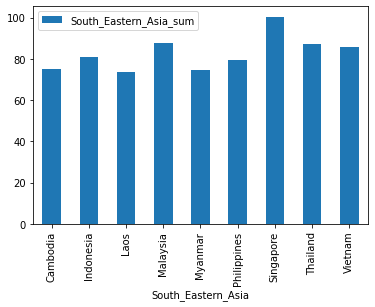

In [ ]:
South_Eastern_Asia = []

South_Eastern_Asia.append(Country_Name[23])
South_Eastern_Asia.append(Country_Name[64])
South_Eastern_Asia.append(Country_Name[79])
South_Eastern_Asia.append(Country_Name[90])
South_Eastern_Asia.append(Country_Name[102])
South_Eastern_Asia.append(Country_Name[118])
South_Eastern_Asia.append(Country_Name[129])
South_Eastern_Asia.append(Country_Name[148])
South_Eastern_Asia.append(Country_Name[162])

South_Eastern_Asia_sum =[]

South_Eastern_Asia_sum.append(df["sum"][23])
South_Eastern_Asia_sum.append(df["sum"][64])
South_Eastern_Asia_sum.append(df["sum"][79])
South_Eastern_Asia_sum.append(df["sum"][90])
South_Eastern_Asia_sum.append(df["sum"][102])
South_Eastern_Asia_sum.append(df["sum"][118])
South_Eastern_Asia_sum.append(df["sum"][129])
South_Eastern_Asia_sum.append(df["sum"][148])
South_Eastern_Asia_sum.append(df["sum"][162])

df104 = pd.DataFrame({'South_Eastern_Asia':South_Eastern_Asia,'South_Eastern_Asia_sum':South_Eastern_Asia_sum})

ax104 = df104.plot.bar(x='South_Eastern_Asia', y='South_Eastern_Asia_sum', rot=90)

Created a graph in order to compare the sum values of each country in Western Asia.

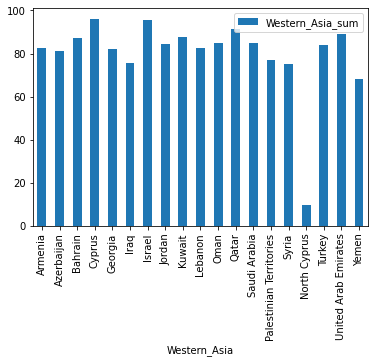

In [ ]:
Western_Asia = []

Western_Asia.append(Country_Name[5])
Western_Asia.append(Country_Name[8])
Western_Asia.append(Country_Name[9])
Western_Asia.append(Country_Name[37])
Western_Asia.append(Country_Name[51])
Western_Asia.append(Country_Name[66])
Western_Asia.append(Country_Name[68])
Western_Asia.append(Country_Name[73])
Western_Asia.append(Country_Name[77])
Western_Asia.append(Country_Name[81])
Western_Asia.append(Country_Name[112])
Western_Asia.append(Country_Name[121])
Western_Asia.append(Country_Name[125])
Western_Asia.append(Country_Name[114])
Western_Asia.append(Country_Name[144])
Western_Asia.append(Country_Name[110])
Western_Asia.append(Country_Name[152])
Western_Asia.append(Country_Name[156])
Western_Asia.append(Country_Name[163])

Western_Asia_sum =[]

Western_Asia_sum.append(df["sum"][5])
Western_Asia_sum.append(df["sum"][8])
Western_Asia_sum.append(df["sum"][9])
Western_Asia_sum.append(df["sum"][37])
Western_Asia_sum.append(df["sum"][51])
Western_Asia_sum.append(df["sum"][66])
Western_Asia_sum.append(df["sum"][68])
Western_Asia_sum.append(df["sum"][73])
Western_Asia_sum.append(df["sum"][77])
Western_Asia_sum.append(df["sum"][81])
Western_Asia_sum.append(df["sum"][112])
Western_Asia_sum.append(df["sum"][121])
Western_Asia_sum.append(df["sum"][125])
Western_Asia_sum.append(df["sum"][114])
Western_Asia_sum.append(df["sum"][144])
Western_Asia_sum.append(df["sum"][110])
Western_Asia_sum.append(df["sum"][152])
Western_Asia_sum.append(df["sum"][156])
Western_Asia_sum.append(df["sum"][163])


df105 = pd.DataFrame({'Western_Asia':Western_Asia,'Western_Asia_sum':Western_Asia_sum})

ax105 = df105.plot.bar(x='Western_Asia', y='Western_Asia_sum', rot=90)

Created a graph in order to compare the sum values of each country in Ocenia.

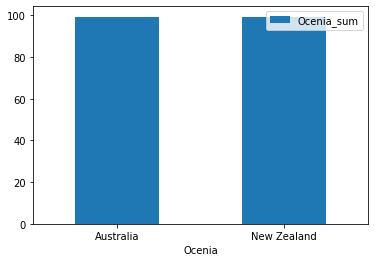

In [ ]:
Ocenia = []

Ocenia.append(Country_Name[6])
Ocenia.append(Country_Name[106])

Ocenia_sum =[]

Ocenia_sum.append(df["sum"][6])
Ocenia_sum.append(df["sum"][106])

df400 = pd.DataFrame({'Ocenia':Ocenia,'Ocenia_sum':Ocenia_sum})

ax400 = df400.plot.bar(x='Ocenia', y='Ocenia_sum', rot=0)

Created a graph in order to compare the sum values of each country in Eastern Africa.

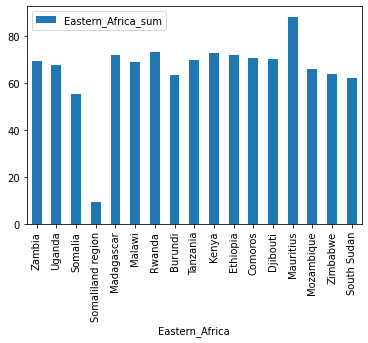

In [ ]:
Eastern_Africa = []

Eastern_Africa.append(Country_Name[164])
Eastern_Africa.append(Country_Name[154])
Eastern_Africa.append(Country_Name[132])
Eastern_Africa.append(Country_Name[133])
Eastern_Africa.append(Country_Name[88])
Eastern_Africa.append(Country_Name[89])
Eastern_Africa.append(Country_Name[124])
Eastern_Africa.append(Country_Name[22])
Eastern_Africa.append(Country_Name[147])
Eastern_Africa.append(Country_Name[75])
Eastern_Africa.append(Country_Name[46])
Eastern_Africa.append(Country_Name[31])
Eastern_Africa.append(Country_Name[40])
Eastern_Africa.append(Country_Name[95])
Eastern_Africa.append(Country_Name[101])
Eastern_Africa.append(Country_Name[165])
Eastern_Africa.append(Country_Name[136])

Eastern_Africa_sum =[]

Eastern_Africa_sum.append(df["sum"][164])
Eastern_Africa_sum.append(df["sum"][154])
Eastern_Africa_sum.append(df["sum"][132])
Eastern_Africa_sum.append(df["sum"][133])
Eastern_Africa_sum.append(df["sum"][88])
Eastern_Africa_sum.append(df["sum"][89])
Eastern_Africa_sum.append(df["sum"][124])
Eastern_Africa_sum.append(df["sum"][22])
Eastern_Africa_sum.append(df["sum"][147])
Eastern_Africa_sum.append(df["sum"][75])
Eastern_Africa_sum.append(df["sum"][46])
Eastern_Africa_sum.append(df["sum"][31])
Eastern_Africa_sum.append(df["sum"][40])
Eastern_Africa_sum.append(df["sum"][95])
Eastern_Africa_sum.append(df["sum"][101])
Eastern_Africa_sum.append(df["sum"][165])
Eastern_Africa_sum.append(df["sum"][136])


df400 = pd.DataFrame({'Eastern_Africa':Eastern_Africa,'Eastern_Africa_sum':Eastern_Africa_sum})

ax400 = df400.plot.bar(x='Eastern_Africa', y='Eastern_Africa_sum', rot=90)

Created a graph in order to compare the sum values of each country in Western Africa.

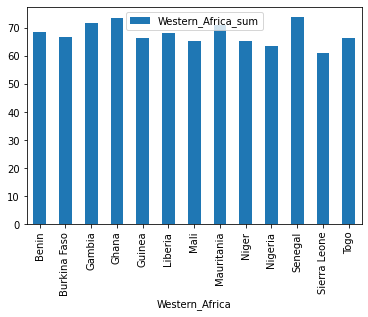

In [ ]:
Western_Africa = []

Western_Africa.append(Country_Name[14])
Western_Africa.append(Country_Name[21])
Western_Africa.append(Country_Name[50])
Western_Africa.append(Country_Name[53])
Western_Africa.append(Country_Name[56])
Western_Africa.append(Country_Name[83])
Western_Africa.append(Country_Name[92])
Western_Africa.append(Country_Name[94])
Western_Africa.append(Country_Name[108])
Western_Africa.append(Country_Name[109])
Western_Africa.append(Country_Name[126])
Western_Africa.append(Country_Name[128])
Western_Africa.append(Country_Name[149])

Western_Africa_sum =[]

Western_Africa_sum.append(df["sum"][14])
Western_Africa_sum.append(df["sum"][21])
Western_Africa_sum.append(df["sum"][50])
Western_Africa_sum.append(df["sum"][53])
Western_Africa_sum.append(df["sum"][56])
Western_Africa_sum.append(df["sum"][83])
Western_Africa_sum.append(df["sum"][92])
Western_Africa_sum.append(df["sum"][94])
Western_Africa_sum.append(df["sum"][108])
Western_Africa_sum.append(df["sum"][109])
Western_Africa_sum.append(df["sum"][126])
Western_Africa_sum.append(df["sum"][128])
Western_Africa_sum.append(df["sum"][149])



df401 = pd.DataFrame({'Western_Africa':Western_Africa,'Western_Africa_sum':Western_Africa_sum})

ax401 = df401.plot.bar(x='Western_Africa', y='Western_Africa_sum', rot=90)

Created a graph in order to compare the sum values of each country in Central Africa.

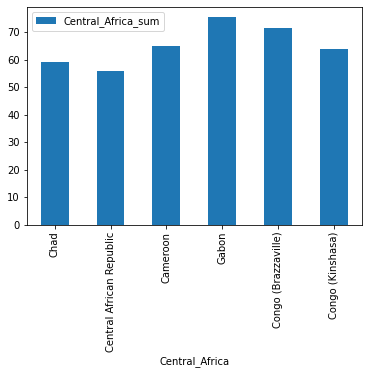

In [ ]:
Central_Africa = []

Central_Africa.append(Country_Name[27])
Central_Africa.append(Country_Name[26])
Central_Africa.append(Country_Name[24])
Central_Africa.append(Country_Name[49])
Central_Africa.append(Country_Name[32])
Central_Africa.append(Country_Name[33])

Central_Africa_sum = []

Central_Africa_sum.append(df["sum"][27])
Central_Africa_sum.append(df["sum"][26])
Central_Africa_sum.append(df["sum"][24])
Central_Africa_sum.append(df["sum"][49])
Central_Africa_sum.append(df["sum"][32])
Central_Africa_sum.append(df["sum"][33])

df402 = pd.DataFrame({'Central_Africa':Central_Africa,'Central_Africa_sum':Central_Africa_sum})

ax402 = df402.plot.bar(x='Central_Africa', y='Central_Africa_sum', rot=90)


Created a graph in order to compare the sum values of each country in Northern Africa.

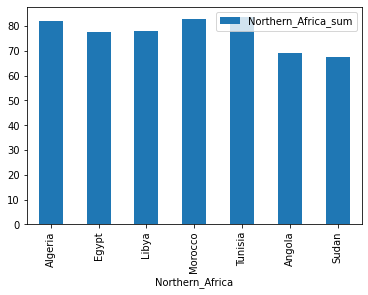

In [ ]:
Northern_Africa = []

Northern_Africa.append(Country_Name[2])
Northern_Africa.append(Country_Name[43])
Northern_Africa.append(Country_Name[84])
Northern_Africa.append(Country_Name[100])
Northern_Africa.append(Country_Name[151])
Northern_Africa.append(Country_Name[3])
Northern_Africa.append(Country_Name[139])

Northern_Africa_sum = []

Northern_Africa_sum.append(df["sum"][2])
Northern_Africa_sum.append(df["sum"][43])
Northern_Africa_sum.append(df["sum"][84])
Northern_Africa_sum.append(df["sum"][100])
Northern_Africa_sum.append(df["sum"][151])
Northern_Africa_sum.append(df["sum"][3])
Northern_Africa_sum.append(df["sum"][139])

df403 = pd.DataFrame({'Northern_Africa':Northern_Africa,'Northern_Africa_sum':Northern_Africa_sum})

ax403 = df403.plot.bar(x='Northern_Africa', y='Northern_Africa_sum', rot=90)


Created a graph in order to compare the sum values of each country in Southern Africa.

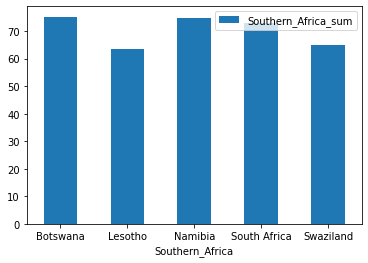

In [ ]:
Southern_Africa = []

Southern_Africa.append(Country_Name[18])
Southern_Africa.append(Country_Name[82])
Southern_Africa.append(Country_Name[103])
Southern_Africa.append(Country_Name[134])
Southern_Africa.append(Country_Name[141])

Southern_Africa_sum = []

Southern_Africa_sum.append(df["sum"][18])
Southern_Africa_sum.append(df["sum"][82])
Southern_Africa_sum.append(df["sum"][103])
Southern_Africa_sum.append(df["sum"][134])
Southern_Africa_sum.append(df["sum"][141])

df404 = pd.DataFrame({'Southern_Africa':Southern_Africa,'Southern_Africa_sum':Southern_Africa_sum})

ax404 = df404.plot.bar(x='Southern_Africa', y='Southern_Africa_sum', rot=0)

Created a graph in order to compare the sum values of each country in North America.

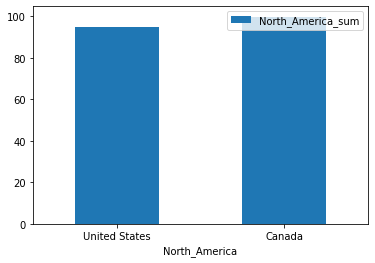

In [ ]:
North_America = []

North_America.append(Country_Name[158])
North_America.append(Country_Name[25])

North_America_sum = []

North_America_sum.append(df["sum"][158])
North_America_sum.append(df["sum"][25])

df405 = pd.DataFrame({'North_America':North_America,'North_America_sum':North_America_sum})

ax405 = df405.plot.bar(x='North_America', y='North_America_sum', rot=0)

Created a graph in order to compare the sum values of each country in Central America.

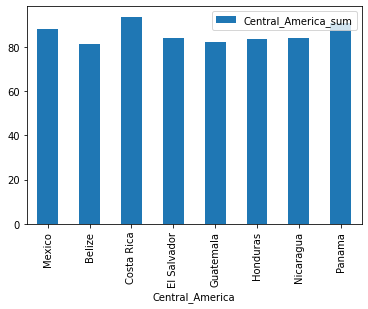

In [ ]:
Central_America = []

Central_America.append(Country_Name[96])
Central_America.append(Country_Name[13])
Central_America.append(Country_Name[34])
Central_America.append(Country_Name[44])
Central_America.append(Country_Name[55])
Central_America.append(Country_Name[59])
Central_America.append(Country_Name[107])
Central_America.append(Country_Name[115])

Central_America_sum = []

Central_America_sum.append(df["sum"][96])
Central_America_sum.append(df["sum"][13])
Central_America_sum.append(df["sum"][34])
Central_America_sum.append(df["sum"][44])
Central_America_sum.append(df["sum"][55])
Central_America_sum.append(df["sum"][59])
Central_America_sum.append(df["sum"][107])
Central_America_sum.append(df["sum"][115])

df406 = pd.DataFrame({'Central_America':Central_America,'Central_America_sum':Central_America_sum})

ax406 = df406.plot.bar(x='Central_America', y='Central_America_sum', rot=90)

Created a graph in order to compare the sum values of each country in Latin America and Caribbean.

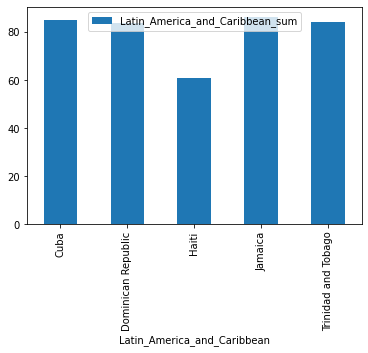

In [ ]:
Latin_America_and_Caribbean = []
Latin_America_and_Caribbean.append(Country_Name[36])
Latin_America_and_Caribbean.append(Country_Name[41])
Latin_America_and_Caribbean.append(Country_Name[58])
Latin_America_and_Caribbean.append(Country_Name[71])
Latin_America_and_Caribbean.append(Country_Name[150])

Latin_America_and_Caribbean_sum =[]
Latin_America_and_Caribbean_sum.append(df["sum"][36])
Latin_America_and_Caribbean_sum.append(df["sum"][41])
Latin_America_and_Caribbean_sum.append(df["sum"][58])
Latin_America_and_Caribbean_sum.append(df["sum"][71])
Latin_America_and_Caribbean_sum.append(df["sum"][150])

df100 = pd.DataFrame({'Latin_America_and_Caribbean':Latin_America_and_Caribbean,'Latin_America_and_Caribbean_sum':Latin_America_and_Caribbean_sum})

ax100 = df100.plot.bar(x='Latin_America_and_Caribbean', y='Latin_America_and_Caribbean_sum', rot=90)

### Visualizations Descriptive Statistics of Core Dataset 2

In the code piece below, we read our second dataset (from United Nations International Migration) and since some of the lines are not necessary we drop them from the start. We also collect the names of the countries in this dataset by creating a list named Country_Names.

In [ ]:
df2 = pd.read_excel("/content/UN_MigrantStockTotal_2017.xlsx",sheet_name=5,header=15,usecols="B,I:K")
for i in range (0,13):
  df2 = df2.drop(i)

Country_Names = []
for i in range(13,270):
  if df2["Unnamed: 1"][i] not in Country_Names:
    Country_Names.append(df2["Unnamed: 1"][i])

print(df2)

                    Unnamed: 1 2005-2010  2010-2015  2015-2017
13                     Burundi   6.16248   4.170770   1.655962
14                     Comoros -0.915481  -0.100107   0.000000
15                    Djibouti    1.9604   2.016609   1.636462
16                     Eritrea   1.81786   0.335271   0.312677
17                    Ethiopia   1.97869  14.335303   2.702524
..                         ...       ...        ...        ...
265                      Samoa  -2.29918  -0.768177  -0.509792
266                    Tokelau   10.1699   2.536144   1.715607
267                      Tonga   1.29629   1.217363   0.763063
268                     Tuvalu  -3.45067  -1.763854   0.704237
269  Wallis and Futuna Islands   3.20466   0.519140  -1.243845

[257 rows x 4 columns]


In the dataset, there are some datas missing and they are shown as "..". In order for our code to work properly we replaced them with NaN.

In [ ]:
df2 = df2.replace(to_replace ="..", value = np.nan)

Our second data has information about migration from/toward countries between the years 2005 and 2017. In order for us to have a general idea, we take the average of the values for every country.

In [ ]:
df2["avr"] = df2.sum(axis=1)/3

print(df2)

                    Unnamed: 1  2005-2010  2010-2015  2015-2017       avr
13                     Burundi   6.162481   4.170770   1.655962  3.996404
14                     Comoros  -0.915481  -0.100107   0.000000 -0.338529
15                    Djibouti   1.960404   2.016609   1.636462  1.871159
16                     Eritrea   1.817856   0.335271   0.312677  0.821934
17                    Ethiopia   1.978687  14.335303   2.702524  6.338838
..                         ...        ...        ...        ...       ...
265                      Samoa  -2.299179  -0.768177  -0.509792 -1.192383
266                    Tokelau  10.169947   2.536144   1.715607  4.807233
267                      Tonga   1.296292   1.217363   0.763063  1.092239
268                     Tuvalu  -3.450671  -1.763854   0.704237 -1.503429
269  Wallis and Futuna Islands   3.204660   0.519140  -1.243845  0.826652

[257 rows x 5 columns]


We created lists named Migrant_Value, Y20052010, Y20102015 and Y20152017 to store the values in order to use them in latter stages.

In [ ]:
Migrant_Value = []
for i in range(13,270):
  Migrant_Value.append(df2["avr"][i])

Y20052010 = []
for i in range(13,270):
  Y20052010.append(df2["2005-2010"][i])

Y20102015 = []
for i in range(13,270):
  Y20102015.append(df2["2010-2015"][i])

Y20152017 = []
for i in range(13,270):
  Y20152017.append(df2["2015-2017"][i])

Since in some rows the data include regions of the continents we removed them.

In [ ]:
df2 = df2.drop(33)
df2 = df2.drop(43)
df2 = df2.drop(51)
df2 = df2.drop(57)
df2 = df2.drop(75)
df2 = df2.drop(76)
df2 = df2.drop(82)
df2 = df2.drop(90)
df2 = df2.drop(100)
df2 = df2.drop(112)
df2 = df2.drop(131)
df2 = df2.drop(132)
df2 = df2.drop(143)
df2 = df2.drop(157)
df2 = df2.drop(174)
df2 = df2.drop(184)
df2 = df2.drop(185)
df2 = df2.drop(212)
df2 = df2.drop(221)
df2 = df2.drop(236)
df2 = df2.drop(242)
df2 = df2.drop(243)
df2 = df2.drop(246)
df2 = df2.drop(252)
df2 = df2.drop(260)

We sorted our data by average values inorder to find the three most countries who has the most migrated from/toward rates.

In [ ]:
df2 = df2.sort_values(by=['avr'])

print(df2)

                Unnamed: 1  2005-2010  2010-2015  2015-2017        avr
91             Afghanistan   3.160624  31.330227 -64.947647 -10.152265
192  Caribbean Netherlands -29.128158   2.551005   1.908946  -8.222736
113                Armenia -15.003261  -2.947573  -0.125681  -6.025505
64                  Guinea  -5.092285  -6.848632  -1.440814  -4.460577
153              Lithuania  -4.487139  -3.343559  -4.342516  -4.057738
..                     ...        ...        ...        ...        ...
139                Romania   2.697924  10.515579  13.850530   9.021344
29                  Uganda  -4.204746  16.328364  17.301421   9.808346
128                 Turkey   0.711813  22.118984   8.347770  10.392855
34                  Angola   4.433565  42.224799   0.497455  15.718606
40       Equatorial Guinea   5.464679  63.735394   2.840783  24.013618

[232 rows x 5 columns]


### Analysis of Migration Patterns of Country with its Happiness Metrics Over Time

We created a dataframe consisting of the countries in both the first core dataset and the second core dataset. This dataset contains the migration ratio of countries between the years 2005-2010, 2010-2015 and 2015-2017 and the happiness value.

In [ ]:
xxxtotal_country = []
total_happiness = []
YY20052010 = []
total_percent_migrant = []
YY20102015 = []
YY20152017 = []


for i in range (len(Country_Name)):
  for k in range (len(Country_Names)):
    if Country_Name[i] == Country_Names[k]:
          xxxtotal_country.append(Country_Name[i])
          total_happiness.append(Happiness_Sum[i])
          total_percent_migrant.append(Migrant_Value[k])
          YY20052010.append(Y20052010[k])
          YY20102015.append(Y20102015[k])
          YY20152017.append(Y20152017[k])


df1000 = pd.DataFrame({'xxxtotal_country':xxxtotal_country, 'YY20052010':YY20052010, 'YY20102015':YY20102015, 'YY20152017':YY20152017, 'total_percent_migrant':total_percent_migrant, 'total_happiness':total_happiness})

print(df1000)

    xxxtotal_country  YY20052010  ...  total_percent_migrant  total_happiness
0        Afghanistan    3.160624  ...             -10.152265        63.792171
1            Albania   -4.083114  ...              -1.312350        85.964210
2            Algeria    1.887757  ...               1.912331        82.043250
3             Angola    4.433565  ...              15.718606        69.175770
4          Argentina    1.528392  ...               2.084937        88.990971
..               ...         ...  ...                    ...              ...
139          Uruguay   -1.528038  ...              -0.125632        91.565477
140       Uzbekistan   -1.714267  ...              -1.013602        81.051540
141            Yemen   10.266627  ...               5.511646        68.393174
142           Zambia  -10.483691  ...              -3.075620        69.052716
143         Zimbabwe    0.262999  ...               0.187033        63.530274

[144 rows x 6 columns]


We displayed the dataframe inorder to compare the migration ratio change of countries with least happiness value and most happiness value through out 2005 and 2017.

In [ ]:
df1000 = df1000.sort_values(by=['total_happiness'])
display(df1000)

,xxxtotal_country,YY20052010,YY20102015,YY20152017,total_percent_migrant,total_happiness
118,Somalia,2.983242,10.994514,3.807683,5.928480,54.995223
25,Central African Republic,-0.209245,-2.715860,4.214453,0.429783,55.881946
26,Chad,3.381933,4.301541,-2.710422,1.657684,59.203591
54,Haiti,2.832763,2.374390,1.254094,2.153749,60.905987
114,Sierra Leone,-8.574108,-1.323250,2.164329,-2.577676,60.991255
...,...,...,...,...,...,...
24,Canada,2.127330,2.236582,1.945461,2.103124,99.737216
126,Sweden,3.442067,3.619806,4.336386,3.799420,99.743866
99,Norway,7.550846,6.968182,3.403135,5.974054,99.967169
115,Singapore,4.709691,3.225403,1.543869,3.159654,100.436435


### Spatial and Temporal Analysis of Core Dataset 2

Below is all the numeric data we collected for each category to have a general perspective of the world.

In [ ]:
df2.describe()

,2005-2010,2010-2015,2015-2017,avr
count,229.000000,232.000000,232.000000,232.000000
mean,1.735155,2.726501,0.939750,1.792990
std,4.708730,6.719993,5.010139,3.244414
min,-29.128158,-11.711226,-64.947647,-10.152265
25%,-0.169636,0.245861,0.264187,0.158682
50%,1.789480,1.230259,0.988064,1.457186
75%,3.775446,3.079904,1.920907,2.914868
max,16.257842,63.735394,17.301421,24.013618


We created a box plot for the average that we find.

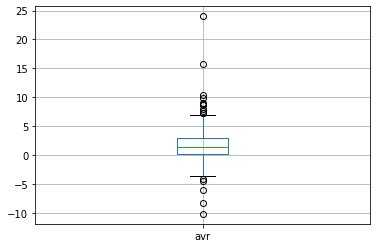

In [ ]:
df2.boxplot(column=["avr"])

### Visualizations Descriptive Statistics of Additional Dataset 1

In the code piece below, we read our third dataset (from United Nations Intentional Homicides and Other Crimes) and since some of the lines are not necessary we drop them from the start.

In [ ]:
df3 = pd.read_excel("/content/SYB63_328_202009_Intentional_Homicides_and_Other_Crimes.xlsx",header = 2,usecols="B:E")
for i in range (0,174):
  df3 = df3.drop(i)

print(df3)

     Region/Country/Area.1  ...     Value
174            Afghanistan  ...    3.3681
175            Afghanistan  ...    6.6784
176            Afghanistan  ...   12.2829
177            Afghanistan  ...    0.7538
178                Albania  ...    4.9890
...                    ...  ...       ...
3727              Zimbabwe  ...  413.9500
3728              Zimbabwe  ...    1.7930
3729              Zimbabwe  ...  738.7400
3730              Zimbabwe  ...    5.5994
3731              Zimbabwe  ...    7.4799

[3558 rows x 4 columns]


We created a list named Country_Namess in order to store the countries in this data and we droped the every crime instead of intentional homicide data from year 2005 and above.

In [ ]:
Country_Namess = []
for i in range(174,3732):
  if df3.Series[i] != 'Intentional homicide rates per 100,000' or df3.Year[i]<2005:
    df3 = df3.drop(i)
  elif df3["Region/Country/Area.1"][i] not in Country_Namess:
    Country_Namess.append(df3["Region/Country/Area.1"][i]) 

print(df3)

     Region/Country/Area.1  ...    Value
174            Afghanistan  ...   3.3681
175            Afghanistan  ...   6.6784
178                Albania  ...   4.9890
184                Albania  ...   4.3080
192                Albania  ...   2.7369
...                    ...  ...      ...
3721                Zambia  ...   5.9827
3722                Zambia  ...   5.3717
3723              Zimbabwe  ...  11.1786
3730              Zimbabwe  ...   5.5994
3731              Zimbabwe  ...   7.4799

[689 rows x 4 columns]


Since some of the countries have multiple intentional homicide rates for different years we merged them by finding their mean and get rid of the year column.

In [ ]:
df3 = df3.groupby("Region/Country/Area.1").mean()
df3 = df3.drop("Year", axis = 1)

print(df3)

                                Value
Region/Country/Area.1                
Afghanistan                  5.023250
Albania                      3.511225
Algeria                      0.895233
American Samoa               8.123933
Andorra                      0.000000
...                               ...
Venezuela (Boliv. Rep. of)  44.521500
Viet Nam                     1.434300
Yemen                        5.153750
Zambia                       5.677200
Zimbabwe                     8.085967

[203 rows x 1 columns]


In the code piece below, we created a list named Homicide_Value with Value values inside inorder to create a graph of countries and their intentional homicide rates.


In [ ]:
Homicide_Value = []

for i in range(203):
  Homicide_Value.append(df3["Value"][i])


### Spatial and Temporal Analysis of Additional Dataset 1

Below is all the numeric data of column value to have a general perspective of the world.

In [ ]:
df3.describe()

,Value
count,203.000000
mean,7.747045
std,11.240872
min,0.000000
25%,1.327000
50%,3.511225
75%,8.742612
max,73.889100


We created a box plot for the values that we find.

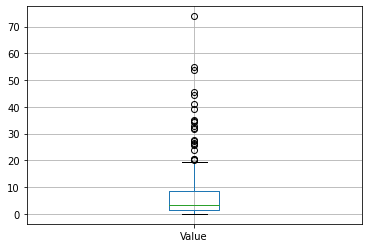

In [ ]:
df3.boxplot(column=["Value"])

Created a graph in order to compare the intentional homicide values of each country in Central Asia.

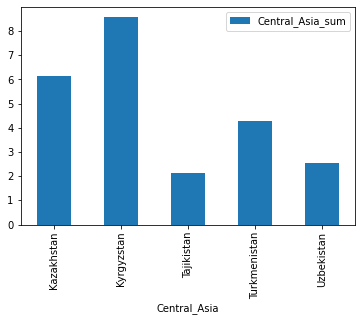

In [ ]:
Central_Asia2 = []

Central_Asia2.append(Country_Namess[94])
Central_Asia2.append(Country_Namess[99])
Central_Asia2.append(Country_Namess[179])
Central_Asia2.append(Country_Namess[186])
Central_Asia2.append(Country_Namess[197])

Central_Asia_sum2 =[]

Central_Asia_sum2.append(df3["Value"][94])
Central_Asia_sum2.append(df3["Value"][99])
Central_Asia_sum2.append(df3["Value"][179])
Central_Asia_sum2.append(df3["Value"][186])
Central_Asia_sum2.append(df3["Value"][197])

df101 = pd.DataFrame({'Central_Asia':Central_Asia2,'Central_Asia_sum':Central_Asia_sum2})

ax101 = df101.plot.bar(x='Central_Asia', y='Central_Asia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Eastern Asia.

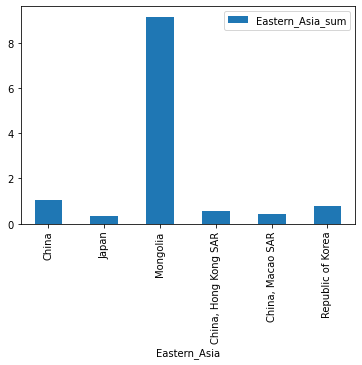

In [ ]:
Eastern_Asia2 = []

Eastern_Asia2.append(Country_Namess[41])
Eastern_Asia2.append(Country_Namess[92])
Eastern_Asia2.append(Country_Namess[116])
Eastern_Asia2.append(Country_Namess[42]) #Hong Kong
Eastern_Asia2.append(Country_Namess[43]) #Macao
Eastern_Asia2.append(Country_Namess[145]) #Republic of Korea

Eastern_Asia_sum2 =[]

Eastern_Asia_sum2.append(df3["Value"][41])
Eastern_Asia_sum2.append(df3["Value"][92])
Eastern_Asia_sum2.append(df3["Value"][116])
Eastern_Asia_sum2.append(df3["Value"][42]) #Hong Kong
Eastern_Asia_sum2.append(df3["Value"][43]) #Macao
Eastern_Asia_sum2.append(df3["Value"][145]) #Republic of Korea

df102 = pd.DataFrame({'Eastern_Asia':Eastern_Asia2,'Eastern_Asia_sum':Eastern_Asia_sum2})

ax102 = df102.plot.bar(x='Eastern_Asia', y='Eastern_Asia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Southern Asia.

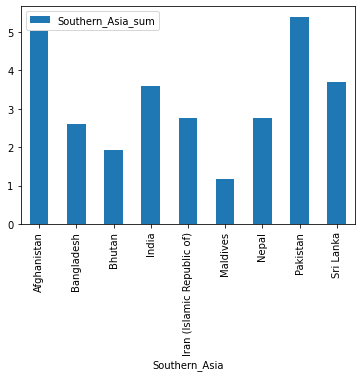

In [ ]:
Southern_Asia2 = []

Southern_Asia2.append(Country_Namess[0])
Southern_Asia2.append(Country_Namess[16])
Southern_Asia2.append(Country_Namess[23])
Southern_Asia2.append(Country_Namess[83])
Southern_Asia2.append(Country_Namess[85])
Southern_Asia2.append(Country_Namess[109])
Southern_Asia2.append(Country_Namess[123])
Southern_Asia2.append(Country_Namess[134])
Southern_Asia2.append(Country_Namess[172])

Southern_Asia_sum2 =[]

Southern_Asia_sum2.append(df3["Value"][0])
Southern_Asia_sum2.append(df3["Value"][16])
Southern_Asia_sum2.append(df3["Value"][23])
Southern_Asia_sum2.append(df3["Value"][83])
Southern_Asia_sum2.append(df3["Value"][85])
Southern_Asia_sum2.append(df3["Value"][109])
Southern_Asia_sum2.append(df3["Value"][123])
Southern_Asia_sum2.append(df3["Value"][134])
Southern_Asia_sum2.append(df3["Value"][172])

df103 = pd.DataFrame({'Southern_Asia':Southern_Asia2,'Southern_Asia_sum':Southern_Asia_sum2})

ax103 = df103.plot.bar(x='Southern_Asia', y='Southern_Asia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in South Eastern Asia.

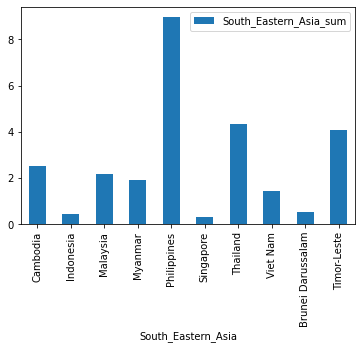

In [ ]:
South_Eastern_Asia2 = []

South_Eastern_Asia2.append(Country_Namess[34])
South_Eastern_Asia2.append(Country_Namess[84])
South_Eastern_Asia2.append(Country_Namess[108])
South_Eastern_Asia2.append(Country_Namess[121])
South_Eastern_Asia2.append(Country_Namess[140])
South_Eastern_Asia2.append(Country_Namess[165])
South_Eastern_Asia2.append(Country_Namess[180])
South_Eastern_Asia2.append(Country_Namess[199])
South_Eastern_Asia2.append(Country_Namess[29]) #Brunei Darussalam
South_Eastern_Asia2.append(Country_Namess[181]) #Timor-Leste

South_Eastern_Asia_sum2 =[]

South_Eastern_Asia_sum2.append(df3["Value"][34])
South_Eastern_Asia_sum2.append(df3["Value"][84])
South_Eastern_Asia_sum2.append(df3["Value"][108])
South_Eastern_Asia_sum2.append(df3["Value"][121])
South_Eastern_Asia_sum2.append(df3["Value"][140])
South_Eastern_Asia_sum2.append(df3["Value"][165])
South_Eastern_Asia_sum2.append(df3["Value"][180])
South_Eastern_Asia_sum2.append(df3["Value"][199])
South_Eastern_Asia_sum2.append(df3["Value"][29]) #Brunei Darussalam
South_Eastern_Asia_sum2.append(df3["Value"][181]) #Timor-Leste

df104 = pd.DataFrame({'South_Eastern_Asia':South_Eastern_Asia2,'South_Eastern_Asia_sum':South_Eastern_Asia_sum2})

ax104 = df104.plot.bar(x='South_Eastern_Asia', y='South_Eastern_Asia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Western Asia.

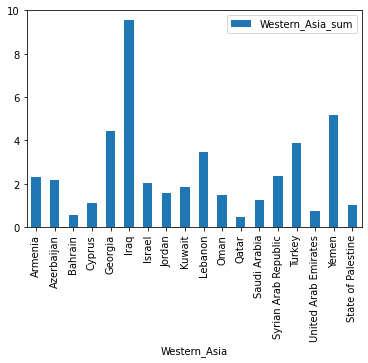

In [ ]:
Western_Asia2 = []

Western_Asia2.append(Country_Namess[9])
Western_Asia2.append(Country_Namess[13])
Western_Asia2.append(Country_Namess[15])
Western_Asia2.append(Country_Namess[50])
Western_Asia2.append(Country_Namess[66])
Western_Asia2.append(Country_Namess[86])
Western_Asia2.append(Country_Namess[89])
Western_Asia2.append(Country_Namess[93])
Western_Asia2.append(Country_Namess[98])
Western_Asia2.append(Country_Namess[101])
Western_Asia2.append(Country_Namess[132])
Western_Asia2.append(Country_Namess[144])
Western_Asia2.append(Country_Namess[160])
Western_Asia2.append(Country_Namess[178])
Western_Asia2.append(Country_Namess[185])
Western_Asia2.append(Country_Namess[191])
Western_Asia2.append(Country_Namess[200])
Western_Asia2.append(Country_Namess[173]) #State of Palestine

Western_Asia_sum2 =[]

Western_Asia_sum2.append(df3["Value"][9])
Western_Asia_sum2.append(df3["Value"][13])
Western_Asia_sum2.append(df3["Value"][15])
Western_Asia_sum2.append(df3["Value"][50]) 
Western_Asia_sum2.append(df3["Value"][66])
Western_Asia_sum2.append(df3["Value"][86])
Western_Asia_sum2.append(df3["Value"][89])
Western_Asia_sum2.append(df3["Value"][93])
Western_Asia_sum2.append(df3["Value"][98])
Western_Asia_sum2.append(df3["Value"][101])
Western_Asia_sum2.append(df3["Value"][132])
Western_Asia_sum2.append(df3["Value"][144])
Western_Asia_sum2.append(df3["Value"][160])
Western_Asia_sum2.append(df3["Value"][178])
Western_Asia_sum2.append(df3["Value"][185])
Western_Asia_sum2.append(df3["Value"][191])
Western_Asia_sum2.append(df3["Value"][200])
Western_Asia_sum2.append(df3["Value"][173]) #State of Palestine


df105 = pd.DataFrame({'Western_Asia':Western_Asia2,'Western_Asia_sum':Western_Asia_sum2})

ax105 = df105.plot.bar(x='Western_Asia', y='Western_Asia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Ocenia.

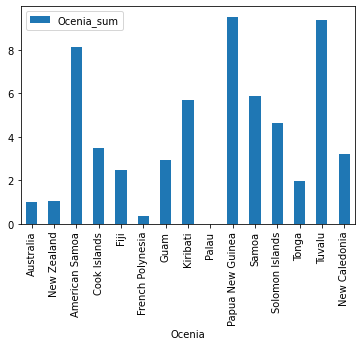

In [ ]:
Ocenia2 = []

Ocenia2.append(Country_Namess[11])
Ocenia2.append(Country_Namess[126])
Ocenia2.append(Country_Namess[3]) #American Samao
Ocenia2.append(Country_Namess[45]) #Cook Island
Ocenia2.append(Country_Namess[61]) #Fiji
Ocenia2.append(Country_Namess[65]) #French Polynesia
Ocenia2.append(Country_Namess[74]) #Guam
Ocenia2.append(Country_Namess[96]) #Kiribati
Ocenia2.append(Country_Namess[135]) #Palau
Ocenia2.append(Country_Namess[137]) #Papua New Guinea
Ocenia2.append(Country_Namess[157]) #Samao
Ocenia2.append(Country_Namess[168]) #Solomon Island
Ocenia2.append(Country_Namess[182]) #Tonga
Ocenia2.append(Country_Namess[188]) #Tuvalu
Ocenia2.append(Country_Namess[125])

Ocenia_sum2 =[]

Ocenia_sum2.append(df3["Value"][11])
Ocenia_sum2.append(df3["Value"][126])
Ocenia_sum2.append(df3["Value"][3]) #American Samao
Ocenia_sum2.append(df3["Value"][45]) #Cook Island
Ocenia_sum2.append(df3["Value"][61]) #Fiji
Ocenia_sum2.append(df3["Value"][65]) #French Polynesia
Ocenia_sum2.append(df3["Value"][74]) #Guam
Ocenia_sum2.append(df3["Value"][96]) #Kiribati
Ocenia_sum2.append(df3["Value"][135]) #Palau
Ocenia_sum2.append(df3["Value"][137]) #Papua New Guinea
Ocenia_sum2.append(df3["Value"][157]) #Samoa
Ocenia_sum2.append(df3["Value"][168]) #Solomon Island
Ocenia_sum2.append(df3["Value"][182]) #Tonga
Ocenia_sum2.append(df3["Value"][188]) #Tuvalu
Ocenia_sum2.append(df3["Value"][125])

df400 = pd.DataFrame({'Ocenia':Ocenia2,'Ocenia_sum':Ocenia_sum2})

ax400 = df400.plot.bar(x='Ocenia', y='Ocenia_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Eastern Europe.

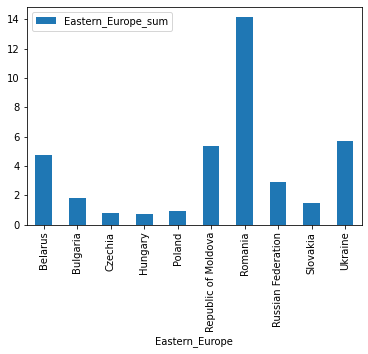

In [ ]:
Eastern_Europe2 = []

Eastern_Europe2.append(Country_Namess[18])
Eastern_Europe2.append(Country_Namess[30])
Eastern_Europe2.append(Country_Namess[51])
Eastern_Europe2.append(Country_Namess[81])
Eastern_Europe2.append(Country_Namess[141])
Eastern_Europe2.append(Country_Namess[146])
Eastern_Europe2.append(Country_Namess[148])
Eastern_Europe2.append(Country_Namess[149])
Eastern_Europe2.append(Country_Namess[166])
Eastern_Europe2.append(Country_Namess[190])

Eastern_Europe_sum2 =[]
Eastern_Europe_sum2.append(df3["Value"][18])
Eastern_Europe_sum2.append(df3["Value"][30])
Eastern_Europe_sum2.append(df3["Value"][51])
Eastern_Europe_sum2.append(df3["Value"][82])
Eastern_Europe_sum2.append(df3["Value"][141])
Eastern_Europe_sum2.append(df3["Value"][146])
Eastern_Europe_sum2.append(df3["Value"][148])
Eastern_Europe_sum2.append(df3["Value"][149])
Eastern_Europe_sum2.append(df3["Value"][166])
Eastern_Europe_sum2.append(df3["Value"][190])

df1111 = pd.DataFrame({'Eastern_Europe':Eastern_Europe2,'Eastern_Europe_sum':Eastern_Europe_sum2})

ax1111 = df1111.plot.bar(x='Eastern_Europe', y='Eastern_Europe_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Northern Europe.

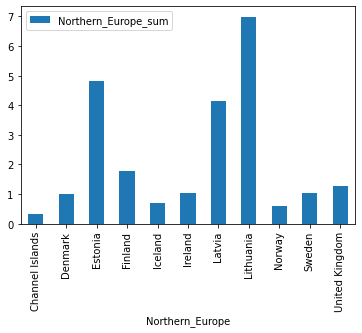

In [ ]:
Northern_Europe2 = []

Northern_Europe2.append(Country_Namess[39])
Northern_Europe2.append(Country_Namess[52])
Northern_Europe2.append(Country_Namess[58])
Northern_Europe2.append(Country_Namess[62])
Northern_Europe2.append(Country_Namess[82])
Northern_Europe2.append(Country_Namess[87])
Northern_Europe2.append(Country_Namess[100])
Northern_Europe2.append(Country_Namess[105])
Northern_Europe2.append(Country_Namess[131])
Northern_Europe2.append(Country_Namess[176])
Northern_Europe2.append(Country_Namess[192])

Northern_Europe_sum2 =[]
Northern_Europe_sum2.append(df3["Value"][39])
Northern_Europe_sum2.append(df3["Value"][52])
Northern_Europe_sum2.append(df3["Value"][58])
Northern_Europe_sum2.append(df3["Value"][62])
Northern_Europe_sum2.append(df3["Value"][82])
Northern_Europe_sum2.append(df3["Value"][87])
Northern_Europe_sum2.append(df3["Value"][100])
Northern_Europe_sum2.append(df3["Value"][105])
Northern_Europe_sum2.append(df3["Value"][131])
Northern_Europe_sum2.append(df3["Value"][176])
Northern_Europe_sum2.append(df3["Value"][192])

df2222 = pd.DataFrame({'Northern_Europe':Northern_Europe2,'Northern_Europe_sum':Northern_Europe_sum2})

ax2222 = df2222.plot.bar(x='Northern_Europe', y='Northern_Europe_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Southern Europe.

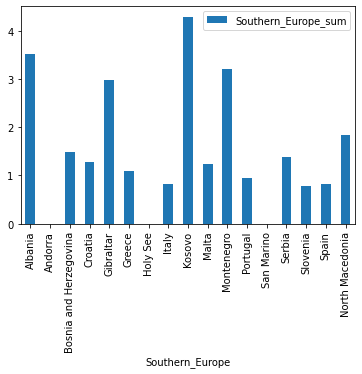

In [ ]:
Southern_Europe2 = []

Southern_Europe2.append(Country_Namess[1])
Southern_Europe2.append(Country_Namess[4])
Southern_Europe2.append(Country_Namess[25])
Southern_Europe2.append(Country_Namess[47])
Southern_Europe2.append(Country_Namess[69])
Southern_Europe2.append(Country_Namess[70])
Southern_Europe2.append(Country_Namess[79])
Southern_Europe2.append(Country_Namess[90])
Southern_Europe2.append(Country_Namess[97])
Southern_Europe2.append(Country_Namess[110])
Southern_Europe2.append(Country_Namess[117])
Southern_Europe2.append(Country_Namess[142])
Southern_Europe2.append(Country_Namess[158])
Southern_Europe2.append(Country_Namess[162])
Southern_Europe2.append(Country_Namess[167])
Southern_Europe2.append(Country_Namess[171])
Southern_Europe2.append(Country_Namess[130])

Southern_Europe_sum2 =[]
Southern_Europe_sum2.append(df3["Value"][1])
Southern_Europe_sum2.append(df3["Value"][4])
Southern_Europe_sum2.append(df3["Value"][25])
Southern_Europe_sum2.append(df3["Value"][47])
Southern_Europe_sum2.append(df3["Value"][69])
Southern_Europe_sum2.append(df3["Value"][70])
Southern_Europe_sum2.append(df3["Value"][79])
Southern_Europe_sum2.append(df3["Value"][90])
Southern_Europe_sum2.append(df3["Value"][97])
Southern_Europe_sum2.append(df3["Value"][110])
Southern_Europe_sum2.append(df3["Value"][117])
Southern_Europe_sum2.append(df3["Value"][142])
Southern_Europe_sum2.append(df3["Value"][158])
Southern_Europe_sum2.append(df3["Value"][162])
Southern_Europe_sum2.append(df3["Value"][167])
Southern_Europe_sum2.append(df3["Value"][171])
Southern_Europe_sum2.append(df3["Value"][130])

df3333 = pd.DataFrame({'Southern_Europe':Southern_Europe2,'Southern_Europe_sum':Southern_Europe_sum2})

ax3333 = df3333.plot.bar(x='Southern_Europe', y='Southern_Europe_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Western Europe.

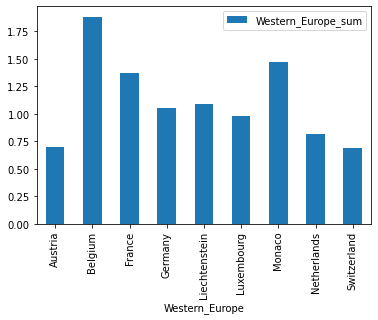

In [ ]:
Western_Europe2 = []

Western_Europe2.append(Country_Namess[12])
Western_Europe2.append(Country_Namess[19])
Western_Europe2.append(Country_Namess[63])
Western_Europe2.append(Country_Namess[67])
Western_Europe2.append(Country_Namess[104])
Western_Europe2.append(Country_Namess[106])
Western_Europe2.append(Country_Namess[115])
Western_Europe2.append(Country_Namess[124])
Western_Europe2.append(Country_Namess[177])

Western_Europe_sum2 =[]
Western_Europe_sum2.append(df3["Value"][12])
Western_Europe_sum2.append(df3["Value"][19])
Western_Europe_sum2.append(df3["Value"][63])
Western_Europe_sum2.append(df3["Value"][67])
Western_Europe_sum2.append(df3["Value"][104])
Western_Europe_sum2.append(df3["Value"][106])
Western_Europe_sum2.append(df3["Value"][115])
Western_Europe_sum2.append(df3["Value"][124])
Western_Europe_sum2.append(df3["Value"][177])

df4444 = pd.DataFrame({'Western_Europe':Western_Europe2,'Western_Europe_sum':Western_Europe_sum2})

ax4444= df4444.plot.bar(x='Western_Europe', y='Western_Europe_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in South America.

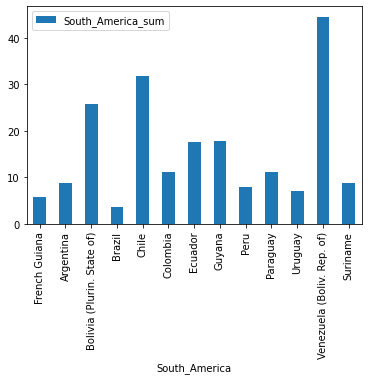

In [ ]:
South_America2 = []

South_America2.append(Country_Namess[64])
South_America2.append(Country_Namess[8])
South_America2.append(Country_Namess[24])
South_America2.append(Country_Namess[27])
South_America2.append(Country_Namess[40])
South_America2.append(Country_Namess[44])
South_America2.append(Country_Namess[55])
South_America2.append(Country_Namess[77])
South_America2.append(Country_Namess[139])
South_America2.append(Country_Namess[138])
South_America2.append(Country_Namess[196])
South_America2.append(Country_Namess[198])
South_America2.append(Country_Namess[175])

South_America_sum2 =[]
South_America_sum2.append(df3["Value"][8])
South_America_sum2.append(df3["Value"][24])
South_America_sum2.append(df3["Value"][27])
South_America_sum2.append(df3["Value"][40])
South_America_sum2.append(df3["Value"][44])
South_America_sum2.append(df3["Value"][55])
South_America_sum2.append(df3["Value"][64])
South_America_sum2.append(df3["Value"][77])
South_America_sum2.append(df3["Value"][139])
South_America_sum2.append(df3["Value"][138])
South_America_sum2.append(df3["Value"][196])
South_America_sum2.append(df3["Value"][198])
South_America_sum2.append(df3["Value"][175])

df5555 = pd.DataFrame({'South_America':South_America2,'South_America_sum':South_America_sum2})

ax5555 = df5555.plot.bar(x='South_America', y='South_America_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Eastern Africa.

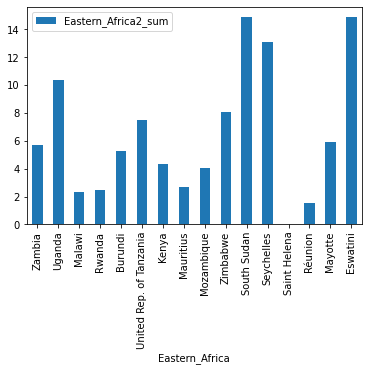

In [ ]:
Eastern_Africa2 = []
Eastern_Africa2.append(Country_Namess[201])
Eastern_Africa2.append(Country_Namess[189])
Eastern_Africa2.append(Country_Namess[107])
Eastern_Africa2.append(Country_Namess[150])
Eastern_Africa2.append(Country_Namess[32])
Eastern_Africa2.append(Country_Namess[193])
Eastern_Africa2.append(Country_Namess[95])
Eastern_Africa2.append(Country_Namess[112])
Eastern_Africa2.append(Country_Namess[120])
Eastern_Africa2.append(Country_Namess[202])
Eastern_Africa2.append(Country_Namess[170])
Eastern_Africa2.append(Country_Namess[163])
Eastern_Africa2.append(Country_Namess[151])
Eastern_Africa2.append(Country_Namess[147])
Eastern_Africa2.append(Country_Namess[113])
Eastern_Africa2.append(Country_Namess[59])

Eastern_Africa2_sum2 =[]
Eastern_Africa2_sum2.append(df3["Value"][201])
Eastern_Africa2_sum2.append(df3["Value"][189])
Eastern_Africa2_sum2.append(df3["Value"][107])
Eastern_Africa2_sum2.append(df3["Value"][150])
Eastern_Africa2_sum2.append(df3["Value"][32])
Eastern_Africa2_sum2.append(df3["Value"][193])
Eastern_Africa2_sum2.append(df3["Value"][95])
Eastern_Africa2_sum2.append(df3["Value"][112])
Eastern_Africa2_sum2.append(df3["Value"][120])
Eastern_Africa2_sum2.append(df3["Value"][202])
Eastern_Africa2_sum2.append(df3["Value"][170])
Eastern_Africa2_sum2.append(df3["Value"][163])
Eastern_Africa2_sum2.append(df3["Value"][151])
Eastern_Africa2_sum2.append(df3["Value"][147])
Eastern_Africa2_sum2.append(df3["Value"][113])
Eastern_Africa2_sum2.append(df3["Value"][59])

df6000 = pd.DataFrame({'Eastern_Africa':Eastern_Africa2,'Eastern_Africa2_sum':Eastern_Africa2_sum2})
ax6000 = df6000.plot.bar(x='Eastern_Africa', y='Eastern_Africa2_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Western Africa.

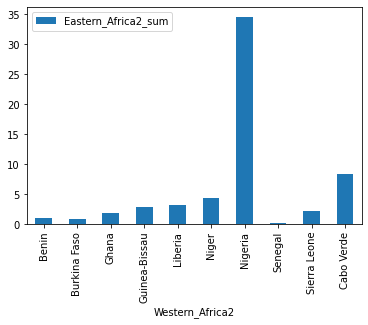

In [ ]:
Western_Africa2 = []
Western_Africa2.append(Country_Namess[21])
Western_Africa2.append(Country_Namess[31])
Western_Africa2.append(Country_Namess[68])
Western_Africa2.append(Country_Namess[76])
Western_Africa2.append(Country_Namess[103])
Western_Africa2.append(Country_Namess[128])
Western_Africa2.append(Country_Namess[129])
Western_Africa2.append(Country_Namess[161])
Western_Africa2.append(Country_Namess[164])
Western_Africa2.append(Country_Namess[33])

Western_Africa2_sum2 =[]
Western_Africa2_sum2.append(df3["Value"][21])
Western_Africa2_sum2.append(df3["Value"][31])
Western_Africa2_sum2.append(df3["Value"][68])
Western_Africa2_sum2.append(df3["Value"][76])
Western_Africa2_sum2.append(df3["Value"][103])
Western_Africa2_sum2.append(df3["Value"][128])
Western_Africa2_sum2.append(df3["Value"][129])
Western_Africa2_sum2.append(df3["Value"][161])
Western_Africa2_sum2.append(df3["Value"][164])
Western_Africa2_sum2.append(df3["Value"][33])

df6001 = pd.DataFrame({'Western_Africa2':Western_Africa2,'Eastern_Africa2_sum':Western_Africa2_sum2})
ax6001 = df6001.plot.bar(x='Western_Africa2', y='Eastern_Africa2_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Central Africa.

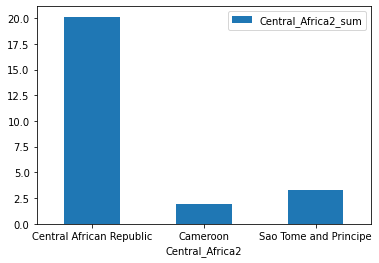

In [ ]:
Central_Africa2 = []
Central_Africa2.append(Country_Namess[38])
Central_Africa2.append(Country_Namess[35])
Central_Africa2.append(Country_Namess[159])

Central_Africa2_sum2 =[]
Central_Africa2_sum2.append(df3["Value"][38])
Central_Africa2_sum2.append(df3["Value"][35])
Central_Africa2_sum2.append(df3["Value"][159])

df6002 = pd.DataFrame({'Central_Africa2':Central_Africa2,'Central_Africa2_sum':Central_Africa2_sum2})
ax6002 = df6002.plot.bar(x='Central_Africa2', y='Central_Africa2_sum', rot=0)

Created a graph in order to compare the intentional homicide values of each country in Northern Africa.

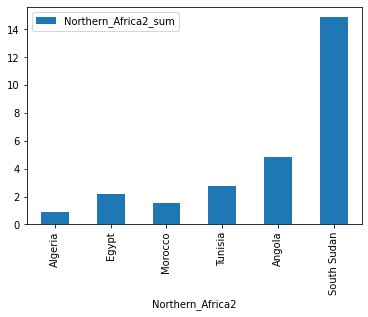

In [ ]:
Northern_Africa2 = []
Northern_Africa2.append(Country_Namess[2])
Northern_Africa2.append(Country_Namess[56])
Northern_Africa2.append(Country_Namess[119])
Northern_Africa2.append(Country_Namess[184])
Northern_Africa2.append(Country_Namess[5])
Northern_Africa2.append(Country_Namess[170])

Northern_Africa2_sum2 =[]
Northern_Africa2_sum2.append(df3["Value"][2])
Northern_Africa2_sum2.append(df3["Value"][56])
Northern_Africa2_sum2.append(df3["Value"][119])
Northern_Africa2_sum2.append(df3["Value"][184])
Northern_Africa2_sum2.append(df3["Value"][5])
Northern_Africa2_sum2.append(df3["Value"][170])

df6003 = pd.DataFrame({'Northern_Africa2':Northern_Africa2,'Northern_Africa2_sum':Northern_Africa2_sum2})
ax6003 = df6003.plot.bar(x='Northern_Africa2', y='Northern_Africa2_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Southern Africa.

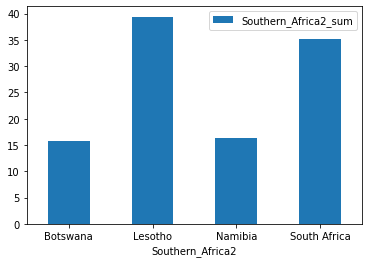

In [ ]:
Southern_Africa2 = []
Southern_Africa2.append(Country_Namess[26])
Southern_Africa2.append(Country_Namess[102])
Southern_Africa2.append(Country_Namess[122])
Southern_Africa2.append(Country_Namess[169])

Southern_Africa2_sum2 =[]
Southern_Africa2_sum2.append(df3["Value"][26])
Southern_Africa2_sum2.append(df3["Value"][102])
Southern_Africa2_sum2.append(df3["Value"][122])
Southern_Africa2_sum2.append(df3["Value"][169])

df6004 = pd.DataFrame({'Southern_Africa2':Southern_Africa2,'Southern_Africa2_sum':Southern_Africa2_sum2})
ax6004 = df6004.plot.bar(x='Southern_Africa2', y='Southern_Africa2_sum', rot=0)

Created a graph in order to compare the intentional homicide values of each country in North America.

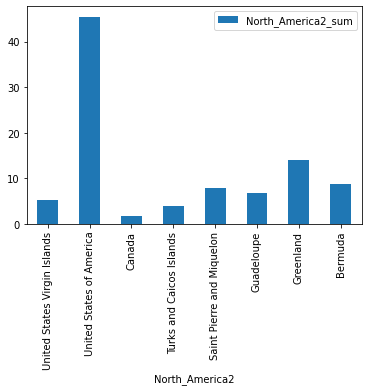

In [ ]:
North_America2 = []
North_America2.append(Country_Namess[195])
North_America2.append(Country_Namess[194])
North_America2.append(Country_Namess[36])
North_America2.append(Country_Namess[187])
North_America2.append(Country_Namess[155])
North_America2.append(Country_Namess[73])
North_America2.append(Country_Namess[71])
North_America2.append(Country_Namess[22])

North_America2_sum2 =[]
North_America2_sum2.append(df3["Value"][195])
North_America2_sum2.append(df3["Value"][194])
North_America2_sum2.append(df3["Value"][36])
North_America2_sum2.append(df3["Value"][187])
North_America2_sum2.append(df3["Value"][155])
North_America2_sum2.append(df3["Value"][73])
North_America2_sum2.append(df3["Value"][71])
North_America2_sum2.append(df3["Value"][22])

df6005 = pd.DataFrame({'North_America2':North_America2,'North_America2_sum':North_America2_sum2})
ax6005 = df6005.plot.bar(x='North_America2', y='North_America2_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Central America.

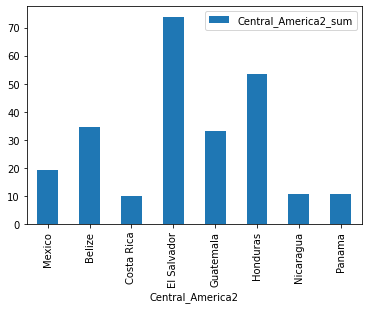

In [ ]:
Central_America2 = []
Central_America2.append(Country_Namess[114])
Central_America2.append(Country_Namess[20])
Central_America2.append(Country_Namess[46])
Central_America2.append(Country_Namess[57])
Central_America2.append(Country_Namess[75])
Central_America2.append(Country_Namess[80])
Central_America2.append(Country_Namess[127])
Central_America2.append(Country_Namess[136])

Central_America2_sum2 =[]
Central_America2_sum2.append(df3["Value"][114])
Central_America2_sum2.append(df3["Value"][20])
Central_America2_sum2.append(df3["Value"][46])
Central_America2_sum2.append(df3["Value"][57])
Central_America2_sum2.append(df3["Value"][75])
Central_America2_sum2.append(df3["Value"][80])
Central_America2_sum2.append(df3["Value"][127])
Central_America2_sum2.append(df3["Value"][136])

df6006 = pd.DataFrame({'Central_America2':Central_America2,'Central_America2_sum':Central_America2_sum2})
ax6006 = df6006.plot.bar(x='Central_America2', y='Central_America2_sum', rot=90)

Created a graph in order to compare the intentional homicide values of each country in Latin America and Caribbean.

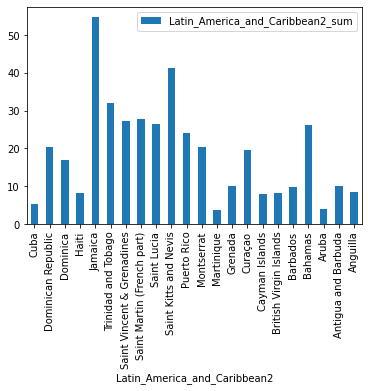

In [ ]:
Latin_America_and_Caribbean2 = []
Latin_America_and_Caribbean2.append(Country_Namess[48])
Latin_America_and_Caribbean2.append(Country_Namess[54])
Latin_America_and_Caribbean2.append(Country_Namess[53])
Latin_America_and_Caribbean2.append(Country_Namess[78])
Latin_America_and_Caribbean2.append(Country_Namess[91])
Latin_America_and_Caribbean2.append(Country_Namess[183])
Latin_America_and_Caribbean2.append(Country_Namess[156])
Latin_America_and_Caribbean2.append(Country_Namess[154])
Latin_America_and_Caribbean2.append(Country_Namess[153])
Latin_America_and_Caribbean2.append(Country_Namess[152])
Latin_America_and_Caribbean2.append(Country_Namess[143])
Latin_America_and_Caribbean2.append(Country_Namess[118])
Latin_America_and_Caribbean2.append(Country_Namess[111])
Latin_America_and_Caribbean2.append(Country_Namess[72])
Latin_America_and_Caribbean2.append(Country_Namess[49])
Latin_America_and_Caribbean2.append(Country_Namess[37])
Latin_America_and_Caribbean2.append(Country_Namess[28])
Latin_America_and_Caribbean2.append(Country_Namess[17])
Latin_America_and_Caribbean2.append(Country_Namess[14])
Latin_America_and_Caribbean2.append(Country_Namess[10])
Latin_America_and_Caribbean2.append(Country_Namess[7])
Latin_America_and_Caribbean2.append(Country_Namess[6])

Latin_America_and_Caribbean2_sum2 =[]
Latin_America_and_Caribbean2_sum2.append(df3["Value"][48])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][54])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][53])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][78])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][91])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][183])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][156])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][154])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][153])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][152])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][143])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][118])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][111])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][72])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][49])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][37])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][28])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][17])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][14])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][10])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][7])
Latin_America_and_Caribbean2_sum2.append(df3["Value"][6])

df6007 = pd.DataFrame({'Latin_America_and_Caribbean2':Latin_America_and_Caribbean2,'Latin_America_and_Caribbean2_sum':Latin_America_and_Caribbean2_sum2})
ax6007 = df6007.plot.bar(x='Latin_America_and_Caribbean2', y='Latin_America_and_Caribbean2_sum', rot=90)

### Visualizations Descriptive Statistics of Additional Dataset 2

In the code piece below, we read our fourth dataset (from United Nations International Migration) and since some of the lines are not necessary we drop them from the start. We also created lists for both countries and migrant values and store the respective values in them.

In [ ]:
df5 = pd.read_excel("UN_MigrantStockByOriginAndDestination_2017.xlsx",sheet_name=1,header=15,usecols="C,G")

for i in range (0,1633):
  df5 = df5.drop(i)
for i in range (1890,1917):
  df5 = df5.drop(i)

Country_Names4 = []
total_migrant4 = []
for i in range(1633,1890):
  if df5["Unnamed: 2"][i] not in Country_Names4:
    Country_Names4.append(df5["Unnamed: 2"][i])
    total_migrant4.append(df5["Total"][i])


df5 = df5.drop(1880)
df5 = df5.drop(1872)
df5 = df5.drop(1866)
df5 = df5.drop(1863)
df5 = df5.drop(1856)
df5 = df5.drop(1841)
df5 = df5.drop(1832)
df5 = df5.drop(1805)
df5 = df5.drop(1804)
df5 = df5.drop(1794)
df5 = df5.drop(1777)
df5 = df5.drop(1763)
df5 = df5.drop(1752)
df5 = df5.drop(1751)
df5 = df5.drop(1732)
df5 = df5.drop(1720)
df5 = df5.drop(1710)
df5 = df5.drop(1702)
df5 = df5.drop(1696)
df5 = df5.drop(1695)
df5 = df5.drop(1677)
df5 = df5.drop(1671)
df5 = df5.drop(1663)
df5 = df5.drop(1653)


print(df5)

                     Unnamed: 2    Total
1633                    Burundi   299569
1634                    Comoros    12555
1635                   Djibouti   116089
1636                    Eritrea    16041
1637                   Ethiopia  1227143
...                         ...      ...
1885                      Samoa     4879
1886                    Tokelau      504
1887                      Tonga     4952
1888                     Tuvalu      143
1889  Wallis and Futuna Islands     2779

[233 rows x 2 columns]


### Spatial and Temporal Analysis of Additional Dataset 2

Below is all the numeric data of column total (migrant value) in order have a general perspective of the world.

In [ ]:
df5.describe()

,Unnamed: 2,Total
count,233,233
unique,233,233
top,Libya,798944
freq,1,1


We created a box plot for the migrant value.


### Analyzing Countries with the Most Immigration and Emigration Statistics

In order to create a new dataframe we find the same countries from each four datasets and their respective happiness sum, intentional homicide rates, migrant percentage and migrant value. We created new lists for each one of them and store the values in those lists. By using the lists we created a combination of all of our datasets.

In [ ]:
total_country = []
total_happiness = []
total_mortality = []
total_percent_migrant = []
total_migrant = []


for i in range (len(Country_Name)):
  for j in range (len(Country_Namess)):
    for k in range (len(Country_Names)):
      for l in range (len(Country_Names4)):
        if Country_Name[i] == Country_Namess[j] == Country_Names[k] == Country_Names4[l]:
          total_country.append(Country_Name[i])
          total_happiness.append(Happiness_Sum[i])
          total_mortality.append(Homicide_Value[j])
          total_percent_migrant.append(Migrant_Value[k])
          total_migrant.append(total_migrant4[l])


df4 = pd.DataFrame({'total_country':total_country,'total_happiness':total_happiness, 'total_mortality':total_mortality, 'total_percent_migrant':total_percent_migrant, 'total_migrant':total_migrant})

print(df4)

    total_country  total_happiness  ...  total_percent_migrant  total_migrant
0     Afghanistan        63.792171  ...             -10.152265         133612
1         Albania        85.964210  ...              -1.312350          52484
2         Algeria        82.043250  ...               1.912331         248624
3          Angola        69.175770  ...              15.718606         638499
4       Argentina        88.990971  ...               2.084937        2164524
..            ...              ...  ...                    ...            ...
126       Uruguay        91.565477  ...              -0.125632          79586
127    Uzbekistan        81.051540  ...              -1.013602        1159190
128         Yemen        68.393174  ...               5.511646         384321
129        Zambia        69.052716  ...              -3.075620         156982
130      Zimbabwe        63.530274  ...               0.187033         403866

[131 rows x 5 columns]


In order to look at all the values for the three most countries who has the most migrated from/toward rates we sorted our data by total migrant percentage.

In [ ]:
df4 = df4.sort_values(by=['total_percent_migrant'])

print(df4)

    total_country  total_happiness  ...  total_percent_migrant  total_migrant
0     Afghanistan        63.792171  ...             -10.152265         133612
5         Armenia        82.645044  ...              -6.025505         190719
69      Lithuania        86.986035  ...              -4.057738         124706
64     Kyrgyzstan        78.993892  ...              -3.175964         200294
129        Zambia        69.052716  ...              -3.075620         156982
..            ...              ...  ...                    ...            ...
90           Oman        84.681756  ...               8.901863        2073292
99        Romania        86.330152  ...               9.021344         370753
122        Uganda        67.730737  ...               9.808346        1692120
120        Turkey        84.009531  ...              10.392855        4881966
3          Angola        69.175770  ...              15.718606         638499

[131 rows x 5 columns]


Below is all the numeric data we collected for each category to have a general perspective of the world.

In [ ]:
df4.describe()

,total_happiness,total_mortality,total_percent_migrant,total_migrant
count,131.000000,131.000000,131.000000,1.310000e+02
mean,83.100610,7.371020,2.164028,1.346529e+06
std,10.821182,11.720272,3.320134,2.295948e+06
min,55.881946,0.267500,-10.152265,6.749000e+03
25%,75.317608,1.261333,-0.006628,1.116680e+05
50%,84.125618,2.765000,2.103124,3.990680e+05
75%,90.297590,7.988683,3.650825,1.251750e+06
max,100.783091,73.889100,15.718606,1.218528e+07


##Statistical Analysis & Hypothesis Testing

###Statistical Tests to Investigate Effects of Features in Global Happiness Report to Life Ladder (Happiness Score) 

H0:The life ladder average of the countries with a happiness score lower than the average is equal to life ladder average of all countries.

H1: The life ladder average of the countries with a happiness score lower than the average is not equal to life ladder average of all countries.

In [ ]:
sample = df[df['sum'] < 79.9]
ttest_1samp(sample['sum'], df['Life Ladder'].mean())

Ttest_1sampResult(statistic=34.52804625979988, pvalue=1.5638227831281734e-43)

Assuming the treshold value is 0.05. Since our p-value is lower than the treshold value, we can reject the null hypothesis and claim that there is a statistically significant difference between mean of life ladder of the countries with a happiness score lower than the average and life ladder of all countries.

###Analyzing Migration Flows with Global Happiness Report Features to Infer Driving Factors of Global Migration Patterns

H0: The total migrant percentage average of the countries with a happiness value lower than the average is equal to the total migrant percentage average of all countries.

H1: The total migrant percentage average of the countries with a happiness value lower than the average is not equal to the total migrant percentage average of all countries.

In [ ]:
sample = df4[df4.total_happiness < 83.1]
ttest_1samp(sample['total_percent_migrant'], df4['total_percent_migrant'].mean())

Ttest_1sampResult(statistic=-0.7511184614263294, pvalue=0.45567131573293573)

Assuming the treshold value is 0.05. Since our p-value is higher than the treshold value, we can accept the null hypothesis and claim that the total migrant percentage average of the countries with a happiness value lower than the average is equal to the total migrant percentage average of all countries.

In [ ]:
sample = df4[df4.total_happiness > 83.1]
ttest_1samp(sample['total_percent_migrant'], df4['total_percent_migrant'].mean())

Ttest_1sampResult(statistic=0.9701105406385045, pvalue=0.33523909954548625)

###Analyzing Similarities & Differences in Migration Patterns of Countries from the UN’s Origin-Destination Dataset

In order to compare the similarities and difference of migration patterns for countries we sorted our data by total migrant value.

In [ ]:

df6 = df4.sort_values(by=['total_migrant'])
print(df6)
print(df6['total_migrant'].median())
for i in range(len(df6)):
  if df6['total_migrant'][i] == 399068.0:
    print(df6['total_country'][i])

            total_country  ...  total_migrant
67                Lesotho  ...           6749
31                   Cuba  ...          13136
47                 Guyana  ...          15530
77               Mongolia  ...          18204
58                Jamaica  ...          23332
..                    ...  ...            ...
41                 France  ...        7902783
124  United Arab Emirates  ...        8312524
125        United Kingdom  ...        8841717
43                Germany  ...       12165083
101          Saudi Arabia  ...       12185284

[131 rows x 5 columns]
399068.0
Ecuador


In [ ]:
total_country1 = []
total_happiness1 = []
total_mortality1 = []
total_percent_migrant1 = []
total_migrant1 = []


total_country1.append(df6["total_country"][67])
total_happiness1.append(df6["total_happiness"][67])
total_mortality1.append(df6["total_mortality"][67])
total_percent_migrant1.append(df6["total_percent_migrant"][67])
total_migrant1.append(df6["total_migrant"][67])

total_country1.append(df6["total_country"][31])
total_happiness1.append(df6["total_happiness"][31])
total_mortality1.append(df6["total_mortality"][31])
total_percent_migrant1.append(df6["total_percent_migrant"][31])
total_migrant1.append(df6["total_migrant"][31])

total_country1.append(df6["total_country"][47])
total_happiness1.append(df6["total_happiness"][47])
total_mortality1.append(df6["total_mortality"][47])
total_percent_migrant1.append(df6["total_percent_migrant"][47])
total_migrant1.append(df6["total_migrant"][47])

total_country1.append(df6["total_country"][77])
total_happiness1.append(df6["total_happiness"][77])
total_mortality1.append(df6["total_mortality"][77])
total_percent_migrant1.append(df6["total_percent_migrant"][77])
total_migrant1.append(df6["total_migrant"][77])

total_country1.append(df6["total_country"][58])
total_happiness1.append(df6["total_happiness"][58])
total_mortality1.append(df6["total_mortality"][58])
total_percent_migrant1.append(df6["total_percent_migrant"][58])
total_migrant1.append(df6["total_migrant"][58])


df12 = pd.DataFrame({'total_country1':total_country1,'total_happiness1':total_happiness1, 'total_mortality1':total_mortality1, 'total_percent_migrant1':total_percent_migrant1, 'total_migrant1':total_migrant1})

display(df12)

,total_country1,total_happiness1,total_mortality1,total_percent_migrant1,total_migrant1
0,Lesotho,63.533207,39.392833,0.735317,6749
1,Cuba,84.972084,5.206200,-1.879165,13136
2,Guyana,75.202602,17.738825,2.474129,15530
3,Mongolia,79.925103,9.173700,3.402538,18204
4,Jamaica,86.211290,54.751300,-0.203874,23332


These are the 5 countries with the lowest number of migrants. When we compare them we can see that mostly they are from different regions of the world (Lesotho: Africa, Cuba-Jamaica: Caribbeans, Mongolia: Asia, Guyana: South America). Appart from Lesotho, the happiness values of the countries are close to the mean of happiness value of all countries (83.1). Appart from Cuba, the number of intentional homicides are higher than the mean of intentional homicide values of all countries (7.4). When we look at the total percentage of migrant (outgoing and incoming combined) we can see that Jamaica and Cuba have an outgoing migrant percentage. Also Lesotho joins them to have a lower total percentage of migrant than the mean of total percentage of migrant of all countries (2.2).

In [ ]:
total_country2 = []
total_happiness2 = []
total_mortality2 = []
total_percent_migrant2 = []
total_migrant2 = []


total_country2.append(df6["total_country"][99])
total_happiness2.append(df6["total_happiness"][99])
total_mortality2.append(df6["total_mortality"][99])
total_percent_migrant2.append(df6["total_percent_migrant"][99])
total_migrant2.append(df6["total_migrant"][99])

total_country2.append(df6["total_country"][128])
total_happiness2.append(df6["total_happiness"][128])
total_mortality2.append(df6["total_mortality"][128])
total_percent_migrant2.append(df6["total_percent_migrant"][128])
total_migrant2.append(df6["total_migrant"][128])

total_country2.append(df6["total_country"][35])
total_happiness2.append(df6["total_happiness"][35])
total_mortality2.append(df6["total_mortality"][35])
total_percent_migrant2.append(df6["total_percent_migrant"][35])
total_migrant2.append(df6["total_migrant"][35])

total_country2.append(df6["total_country"][130])
total_happiness2.append(df6["total_happiness"][130])
total_mortality2.append(df6["total_mortality"][130])
total_percent_migrant2.append(df6["total_percent_migrant"][130])
total_migrant2.append(df6["total_migrant"][130])

total_country2.append(df6["total_country"][29])
total_happiness2.append(df6["total_happiness"][29])
total_mortality2.append(df6["total_mortality"][29])
total_percent_migrant2.append(df6["total_percent_migrant"][29])
total_migrant2.append(df6["total_migrant"][29])


df13 = pd.DataFrame({'total_country2':total_country2,'total_happiness2':total_happiness2, 'total_mortality2':total_mortality2, 'total_percent_migrant2':total_percent_migrant2, 'total_migrant2':total_migrant2})

display(df13)

,total_country2,total_happiness2,total_mortality2,total_percent_migrant2,total_migrant2
0,Romania,86.330152,14.122550,9.021344,370753
1,Yemen,68.393174,5.153750,5.511646,384321
2,Ecuador,86.069638,11.111200,5.332925,399068
3,Zimbabwe,63.530274,8.085967,0.187033,403866
4,Costa Rica,93.666400,10.044800,1.030025,414214


These are the 5 countries at the median of the df6 which sorts countries according to the incoming number of migrants. When we compare them we can see that mostly they are from different regions of the world (Zimbabwe: Africa, Yemen: Asia, Romania: Europe, Costa Rica: Central America, Ecuador: South America). Yemen and Zimbabwe have a fairly low total happiness value compared to Ecuador, Costa Rica and Romania and their values are lower than the mean of happiness value of all countries (83.1). Appart from Yemen, the number of intentional homicides are higher than the mean of intentional homicide values of all countries (7.4). When we look at the total percentage of migrant (outgoing and incoming combined) we can see that all countries have an incoming migrant percentage but Zimbabwe and Costa Rica have a lower total percentage of migrant than the mean of total percentage of migrant of all countries (2.2).

In [ ]:
total_country3 = []
total_happiness3 = []
total_mortality3 = []
total_percent_migrant3 = []
total_migrant3 = []


total_country3.append(df6["total_country"][101])
total_happiness3.append(df6["total_happiness"][101])
total_mortality3.append(df6["total_mortality"][101])
total_percent_migrant3.append(df6["total_percent_migrant"][101])
total_migrant3.append(df6["total_migrant"][101])

total_country3.append(df6["total_country"][43])
total_happiness3.append(df6["total_happiness"][43])
total_mortality3.append(df6["total_mortality"][43])
total_percent_migrant3.append(df6["total_percent_migrant"][43])
total_migrant3.append(df6["total_migrant"][43])

total_country3.append(df6["total_country"][125])
total_happiness3.append(df6["total_happiness"][125])
total_mortality3.append(df6["total_mortality"][125])
total_percent_migrant3.append(df6["total_percent_migrant"][125])
total_migrant3.append(df6["total_migrant"][125])

total_country3.append(df6["total_country"][124])
total_happiness3.append(df6["total_happiness"][124])
total_mortality3.append(df6["total_mortality"][124])
total_percent_migrant3.append(df6["total_percent_migrant"][124])
total_migrant3.append(df6["total_migrant"][124])

total_country3.append(df6["total_country"][41])
total_happiness3.append(df6["total_happiness"][41])
total_mortality3.append(df6["total_mortality"][41])
total_percent_migrant3.append(df6["total_percent_migrant"][41])
total_migrant3.append(df6["total_migrant"][41])


df14 = pd.DataFrame({'total_country3':total_country3,'total_happiness3':total_happiness3, 'total_mortality3':total_mortality3, 'total_percent_migrant3':total_percent_migrant3, 'total_migrant3':total_migrant3})

display(df14)

,total_country3,total_happiness3,total_mortality3,total_percent_migrant3,total_migrant3
0,Saudi Arabia,85.029558,1.263300,5.421024,12185284
1,Germany,97.205265,1.050300,3.459155,12165083
2,United Kingdom,96.971176,1.259367,3.166751,8841717
3,United Arab Emirates,89.200139,0.759417,6.586672,8312524
4,France,96.853754,1.371275,1.043689,7902783


These are the 5 countries with the highest number of migrants. When we compare them we can see that mostly they are from similar regions of the world (Saudi Arabia-United Arab Emirates: Asia, Germany-France-United Kingdom: Europe). The happiness values of the countries are much higher than the mean of happiness value of all countries (83.1). The number of intentional homicides are significantly lower than the mean of intentional homicide values of all countries (7.4). When we look at the total percentage of migrant (outgoing and incoming combined) we can see that all of them have an incoming migrant percentage but France have a lower total percentage of migrant than the mean of total percentage of migrant of all countries (2.2).

###Hypothesis-1


H0:The total migrant percentage average of the countries with a homicide value lower than the average is equal to the total migrant percentage average of all countries.

H1: The total migrant percentage average of the countries with a homicide value lower than the average is not equal to the total migrant percentage average of all countries.



In [ ]:
sample = df4[df4.total_mortality < 7.4]
ttest_1samp(sample['total_percent_migrant'], df4['total_percent_migrant'].mean())

Ttest_1sampResult(statistic=-0.5850235411040975, pvalue=0.559904447550378)

Assuming the treshold value is 0.05. Since our p-value is higher than the treshold value, we can accept the null hypothesis and claim that the total migrant percentage average of the countries with a homicide value lower than the average is equal to the total migrant percentage average of all countries.

In [ ]:
sample = df4[df4.total_mortality > 7.4]
ttest_1samp(sample['total_percent_migrant'], df4['total_percent_migrant'].mean())

Ttest_1sampResult(statistic=1.1019992167637944, pvalue=0.2784346532508819)

###Hypothesis-2

H0:The total migrant percentage average of the countries with total migrant entering the country lower than the average is equal to the total migrant percentage average of all countries.

H1: The total migrant percentage average of the countries with total migrant entering the country lower than the average is not equal to the total migrant percentage average of all countries.

In [ ]:
sample = df4[df4.total_migrant < 1346529]
ttest_1samp(sample['total_percent_migrant'], df4['total_percent_migrant'].mean())

Ttest_1sampResult(statistic=-1.4489687000708213, pvalue=0.15053865574107345)

Assuming the treshold value is 0.05. Since our p-value is higher than the treshold value, we can accept the null hypothesis and claim that the total migrant percentage average of the countries with total migrant entering the coutnry lower than the average is equal to the total migrant percentage average of all countries.

##Machine Learning

###Regression models to predict Life Ladder (Happiness Score) of countries

We created a linear regression model between life ladder and sum values (happiness values) in order to show the rigth proportion between them. 

8.93698978527355
31.806153940748487


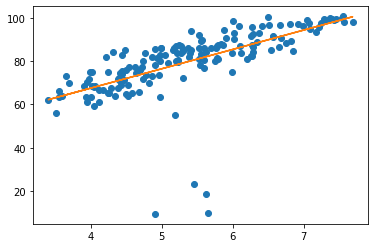

In [ ]:
from ipywidgets import interact, widgets
y = df['sum']
x = df['Life Ladder']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print(m)
print(b)

###Introducing Aggregated Migration Features of Countries to Regression Models

We created a linear regression model between happiness values and migrant percentage values in order to show the rigth proportion between them. Since happiness values has a rigth proportion with life ladder we can also say migrant percentage has a rigth proportion with life ladder.

0.02097732224679106
0.4207994663093132


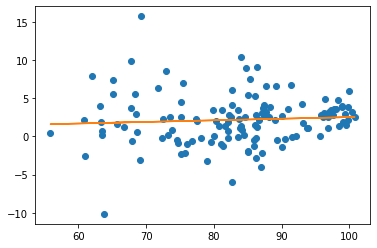

In [ ]:
x = df4['total_happiness']
y = df4['total_percent_migrant']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print(m)
print(b)

We created a linear regression model between happiness values and migrant values in order to show the rigth proportion between them. Since happiness values has a rigth proportion with life ladder we can also say migrant values has a rigth proportion with life ladder.

64941.949802866075
-4050186.886051804


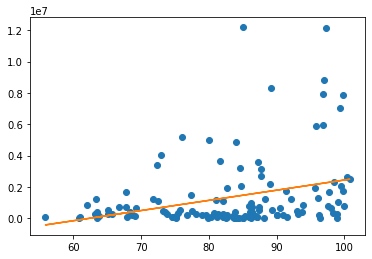

In [ ]:
x = df4['total_happiness']
y = df4['total_migrant']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print(m)
print(b)

###Introducing Further Demographic and Socio-Economic Metrics from Additional Data Sources to Regression Models


We created a linear regression model between happiness values and intentional murder values per 100,000 people in order to show the inverse proportion between them. Since happiness values has a rigth proportion with life ladder we can also say intentional murder values per 100,000 people has a inverse proportion with life ladder.

-0.22699541867902154
26.23447788034594


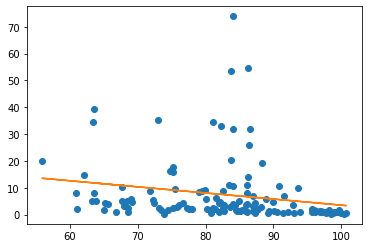

In [ ]:
x = df4['total_happiness']
y = df4['total_mortality']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print(m)
print(b)

###Combination of Regression Models to Predict Life Ladder of Countries

In order to find the score, coefficant and intercept value we again created a linear regression between happiness value and migrant percentage value.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

combined = np.vstack((df4['total_happiness'], df4['total_percent_migrant'])).T
X = combined
y = np.dot(X, np.array([1, 2])) + 3

reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

1.0

In [ ]:
reg.coef_

array([1., 2.])

In [ ]:
reg.intercept_

2.999999999999986

We created a new dataframe with the same countries from each four datasets and their respective life ladder, happiness sum, intentional homicide rates, migrant percentage and migrant value. We created new lists for each one of them and store the values in those lists and used these lists to create the dataframe. 

In [ ]:
total_country9 = []
total_happiness9 = []
total_ladder9 = []
total_mortality9 = []
total_percent_migrant9 = []
total_migrant9 = []

for i in range (len(Country_Name)):
  for j in range (len(Country_Namess)):
    for k in range (len(Country_Names)):
      for l in range (len(Country_Names4)):
        if Country_Name[i] == Country_Namess[j] == Country_Names[k] == Country_Names4[l]:
          total_country9.append(Country_Name[i])
          total_happiness9.append(Happiness_Sum[i])
          total_ladder9.append(Life_Ladder[i])
          total_mortality9.append(Homicide_Value[j])
          total_percent_migrant9.append(Migrant_Value[k])
          total_migrant9.append(total_migrant4[l])

df10 = pd.DataFrame({'total_country9':total_country9,'total_ladder9':total_ladder9, 'total_happiness9':total_happiness9, 'total_mortality9':total_mortality9, 'total_percent_migrant9':total_percent_migrant9, 'total_migrant9':total_migrant9})

print(df10)

    total_country9  total_ladder9  ...  total_percent_migrant9  total_migrant9
0      Afghanistan       3.594628  ...              -10.152265          133612
1          Albania       4.990636  ...               -1.312350           52484
2          Algeria       5.389717  ...                1.912331          248624
3           Angola       4.420299  ...               15.718606          638499
4        Argentina       6.339423  ...                2.084937         2164524
..             ...            ...  ...                     ...             ...
126        Uruguay       6.258516  ...               -0.125632           79586
127     Uzbekistan       5.791761  ...               -1.013602         1159190
128          Yemen       3.912124  ...                5.511646          384321
129         Zambia       4.529805  ...               -3.075620          156982
130       Zimbabwe       3.934324  ...                0.187033          403866

[131 rows x 6 columns]


We combined happiness values, intentional murder values per 100,000 people, migrant percentage values and migrant values. Then we created a linear regression between our combination and life ladder.

In [ ]:
features = ['total_happiness9','total_mortality9', 'total_percent_migrant9', 'total_migrant9']
X = df10[features].values 
target = df10['total_ladder9'].values

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then we looked at the coefficients of the linear regression for each member in combination. Since the life ladder values are between 3 and 8 coefficients having low values are expactable and understandable. When we look at the coefficients we can deduct that our linear regression is true since every coefficient is bigger than 0.

In [ ]:
coeff_df10 = pd.DataFrame(model.coef_, features, columns=['Coefficient']) 
coeff_df10

,Coefficient
total_happiness9,8.258091e-02
total_mortality9,1.303252e-02
total_percent_migrant9,9.360831e-03
total_migrant9,6.075932e-08


###Random Forest Regressor

From the linear reggresion created above we created a random forest regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=130, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

After some calculations we found out that our random forest regressor had a mean absolute error of 0.44 degrees.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
predictions = model_rf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.44 degrees.


After some calculations we found out that our random forest test accuracy is 92.81%.

In [ ]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Random Forest Test Accuracy:', round(accuracy, 2), '%.')

Random Forest Test Accuracy: 92.81 %.


We changed n_estimators and maximum depth inorder to adjust the random forest regressor better in our case hence, our mean absolute error increased by 0.04 and become 0.48 degrees.

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100,max_depth=2)
model_rf.fit(X_train, y_train,)

predictions = model_rf.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.48 degrees.


###Efforts on Better Feature Selection, Hyper-Parameter Tuning of Models, and Scaling/Normalization if Possible 

We learned that our random forest regreesor model had an average error of 0.4784 degrees and had an accuracy of 91.87%. After some hyper-parameter tuning we managed to decrease the random forest regreesor model's average error by 0.0463 to 0.4321 and increase the random forest regreesor model's accuracy by 0.97 to 92.84%.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 101)]
max_depth.append(None)
min_samples_split = [2, 5, 6]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train,)

base_model = model_rf
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


Model Performance
Average Error: 0.4768 degrees.
Accuracy = 91.93%.
Model Performance
Average Error: 0.4950 degrees.
Accuracy = 91.86%.
Improvement of -0.08%.
